#Install Dependency

In [ ]:
!apt-get install espeak -y
!pip install -r requirements. txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.6/867.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

#Set API Keys

In [ ]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("TAVILY_API_KEY")
_set_env("LANGCHAIN_API_KEY")
_set_env("COHERE_API_KEY")


os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Customer Support Bot Tutorial"

TAVILY_API_KEY: ··········
LANGCHAIN_API_KEY: ··········
COHERE_API_KEY: ··········


#Lookup Company Policies

In [ ]:
import codecs
import re

def extract_persian_text(filename):

  with codecs.open(filename, 'r', encoding='utf-8') as f:
    text = f.read()

  text = text.replace(u'\u200c', '')
  docs = [{"page_content": txt} for txt in re.split(r"(?=\n##)", text)]
  return docs

docs = extract_persian_text('./Alibaba_question_and_answers.md')

In [ ]:
len(docs)

10

In [ ]:
print(docs[0])

{'page_content': '## پرواز داخلی\n1. آیا امکان اصلاح کد ملی و اصلاح تاریخ تولد وجود دارد؟\n\nبله، در اکثر پروازها امکان اصلاح کد ملی و تاریخ تولد (به شرط عوضنشدن بازه سنی بزرگسال، کودک و نوزاد) وجود دارد. مسافر باید تا قبل از ارسال لیست باقی مسافران (معمولا بین 3 تا 6 ساعت قبل پرواز) درخواست پشتیبانی خود را ثبت کند.\n\n2. تفاوت بلیطهای سیستمی و چارتری چیست؟\n\nدر بلیطهای سیستمی، نرخگذاری و قوانین استرداد توسط هواپیمایی اعلام میشود، ولی در بلیطهای چارتری نرخگذاری و قوانین استرداد را تامینکنندههای بلیط اعلام میکنند.\nدر پروازهای سیستمی نرخ کودک (2 تا 12 سال) معادل 50 الی 100 درصد پایه بلیط بزرگسال است، ولی در پروازهای چارتری نرخ بلیط کودک و بزرگسال یکسان است.\nامکان کنسلی آنلاین برای بلیطهای سیستمی و چارتری وجود دارد، ولی بعضی از پروازها (فارغ از سیستمی و چارتریبودنشان) غیرقابلاسترداد هستند.\n\n3. چرا نمیتوانم برای بیشتر از 9 نفر بلیط تهیه کنم؟\n\nبا توجه به محدودیتهای اعلامی هواپیماییها، امکان صدور همزمان بیش از 9 بلیط در یک سفارش وجود ندارد.\n\n4. چند روز قبل از پرواز، بلیط هواپیما بخر

In [ ]:
import numpy as np
from langchain_core.tools import tool
from langchain_cohere import CohereEmbeddings
import cohere

class VectorStoreRetriever:
    def __init__(self, docs: list, vectors: list):
        self._arr = np.array(vectors)
        self._docs = docs


    @classmethod
    def from_docs(cls, docs):

        embeddings = CohereEmbeddings(
                model="embed-multilingual-v3.0")

        filename = './Alibaba_question_and_answers.md'
        truncated_texts = [doc["page_content"]for doc in docs]
        vectors = embeddings.embed_documents(truncated_texts)

        return cls(docs, vectors)

    def query(self, query: str, k: int = 5) -> list[dict]:
        embeddings = CohereEmbeddings(
            model="embed-multilingual-v3.0"
        )
        query_embedding = embeddings.embed_query(query)
        # "@" is just a matrix multiplication in python
        scores = np.array(query_embedding) @ self._arr.T
        top_k_idx = np.argpartition(scores, -k)[-k:]
        top_k_idx_sorted = top_k_idx[np.argsort(-scores[top_k_idx])]
        return [
            {**self._docs[idx], "similarity": scores[idx]} for idx in top_k_idx_sorted
        ]



#client = cohere.Client()

retriever = VectorStoreRetriever.from_docs(docs)

In [ ]:
@tool
def lookup_policy(query: str) -> str:

    """Consult the company policies to check whether certain options are permitted.
    Use this before making any flight changes performing other 'write' events."""

    docs = retriever.query(query, k=5)

    return "\n\n".join([doc["page_content"] for doc in docs])

#Set Up and Preprocess Travel SQLite Database

In [ ]:
import os
import shutil
import sqlite3

import pandas as pd
import requests

db_url = "https://storage.googleapis.com/benchmarks-artifacts/travel-db/travel2.sqlite"
local_file = "travel2.sqlite"
# The backup lets us restart for each tutorial section
backup_file = "travel2.backup.sqlite"
overwrite = False
if overwrite or not os.path.exists(local_file):
    response = requests.get(db_url)
    response.raise_for_status()  # Ensure the request was successful
    with open(local_file, "wb") as f:
        f.write(response.content)
    # Backup - we will use this to "reset" our DB in each section
    shutil.copy(local_file, backup_file)
# Convert the flights to present time for our tutorial
conn = sqlite3.connect(local_file)
cursor = conn.cursor()

tables = pd.read_sql(
    "SELECT name FROM sqlite_master WHERE type='table';", conn
).name.tolist()
tdf = {}
for t in tables:
    tdf[t] = pd.read_sql(f"SELECT * from {t}", conn)

example_time = pd.to_datetime(
    tdf["flights"]["actual_departure"].replace("\\N", pd.NaT)
).max()
current_time = pd.to_datetime("now").tz_localize(example_time.tz)
time_diff = current_time - example_time

tdf["bookings"]["book_date"] = (
    pd.to_datetime(tdf["bookings"]["book_date"].replace("\\N", pd.NaT), utc=True)
    + time_diff
)

datetime_columns = [
    "scheduled_departure",
    "scheduled_arrival",
    "actual_departure",
    "actual_arrival",
]
for column in datetime_columns:
    tdf["flights"][column] = (
        pd.to_datetime(tdf["flights"][column].replace("\\N", pd.NaT)) + time_diff
    )

for table_name, df in tdf.items():
    df.to_sql(table_name, conn, if_exists="replace", index=False)
del df
del tdf
conn.commit()
conn.close()

db = local_file  # We'll be using this local file as our DB in this tutorial

<ipython-input-9-bea433b0ea9e>:34: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  current_time = pd.to_datetime("now").tz_localize(example_time.tz)


#Tools

##Flights

In [ ]:
import sqlite3
from datetime import date, datetime, timedelta
from typing import Optional, Union

import pytz
from langchain_core.runnables import ensure_config


@tool
def fetch_user_flight_information() -> list[dict]:
    """Fetch all tickets for the user along with corresponding flight information and seat assignments.

    Returns:
        A list of dictionaries where each dictionary contains the ticket details,
        associated flight details, and the seat assignments for each ticket belonging to the user.
    """
    config = ensure_config()  # Fetch from the context
    configuration = config.get("configurable", {})
    passenger_id = configuration.get("passenger_id", None)
    if not passenger_id:
        raise ValueError("No passenger ID configured.")

    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = """
    SELECT
        t.ticket_no, t.book_ref,
        f.flight_id, f.flight_no, f.departure_airport, f.arrival_airport, f.scheduled_departure, f.scheduled_arrival,
        bp.seat_no, tf.fare_conditions
    FROM
        tickets t
        JOIN ticket_flights tf ON t.ticket_no = tf.ticket_no
        JOIN flights f ON tf.flight_id = f.flight_id
        JOIN boarding_passes bp ON bp.ticket_no = t.ticket_no AND bp.flight_id = f.flight_id
    WHERE
        t.passenger_id = ?
    """
    cursor.execute(query, (passenger_id,))
    rows = cursor.fetchall()
    column_names = [column[0] for column in cursor.description]
    results = [dict(zip(column_names, row)) for row in rows]

    cursor.close()
    conn.close()

    return results


@tool
def search_flights(
    departure_airport: Optional[str] = None,
    arrival_airport: Optional[str] = None,
    start_time: Optional[Union[str, None]] = None,
    end_time: Optional[Union[str, None]] = None,
    limit: int = 20,
) -> list[dict]:
    """Search for flights based on departure airport, arrival airport, and departure time range."""
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = "SELECT * FROM flights WHERE 1 = 1"
    params = []

    if departure_airport:
        query += " AND departure_airport = ?"
        params.append(departure_airport)

    if arrival_airport:
        query += " AND arrival_airport = ?"
        params.append(arrival_airport)

    if start_time:
        query += " AND scheduled_departure >= ?"
        params.append(start_time)

    if end_time:
        query += " AND scheduled_departure <= ?"
        params.append(end_time)
    query += " LIMIT ?"
    params.append(limit)
    cursor.execute(query, params)
    rows = cursor.fetchall()
    column_names = [column[0] for column in cursor.description]
    results = [dict(zip(column_names, row)) for row in rows]

    cursor.close()
    conn.close()

    return results


@tool
def update_ticket_to_new_flight(ticket_no: str, new_flight_id: int) -> str:
    """Update the user's ticket to a new valid flight."""
    config = ensure_config()
    configuration = config.get("configurable", {})
    passenger_id = configuration.get("passenger_id", None)
    if not passenger_id:
        raise ValueError("No passenger ID configured.")

    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "SELECT departure_airport, arrival_airport, scheduled_departure FROM flights WHERE flight_id = ?",
        (new_flight_id,),
    )
    new_flight = cursor.fetchone()
    if not new_flight:
        cursor.close()
        conn.close()
        return "Invalid new flight ID provided."
    column_names = [column[0] for column in cursor.description]
    new_flight_dict = dict(zip(column_names, new_flight))
    timezone = pytz.timezone("Etc/GMT-3")
    current_time = datetime.now(tz=timezone)
    departure_time = datetime.strptime(
        new_flight_dict["scheduled_departure"], "%Y-%m-%d %H:%M:%S.%f%z"
    )
    time_until = (departure_time - current_time).total_seconds()
    if time_until < (3 * 3600):
        return f"Not permitted to reschedule to a flight that is less than 3 hours from the current time. Selected flight is at {departure_time}."

    cursor.execute(
        "SELECT flight_id FROM ticket_flights WHERE ticket_no = ?", (ticket_no,)
    )
    current_flight = cursor.fetchone()
    if not current_flight:
        cursor.close()
        conn.close()
        return "No existing ticket found for the given ticket number."

    # Check the signed-in user actually has this ticket
    cursor.execute(
        "SELECT * FROM tickets WHERE ticket_no = ? AND passenger_id = ?",
        (ticket_no, passenger_id),
    )
    current_ticket = cursor.fetchone()
    if not current_ticket:
        cursor.close()
        conn.close()
        return f"Current signed-in passenger with ID {passenger_id} not the owner of ticket {ticket_no}"

    # In a real application, you'd likely add additional checks here to enforce business logic,
    # like "does the new departure airport match the current ticket", etc.
    # While it's best to try to be *proactive* in 'type-hinting' policies to the LLM
    # it's inevitably going to get things wrong, so you **also** need to ensure your
    # API enforces valid behavior
    cursor.execute(
        "UPDATE ticket_flights SET flight_id = ? WHERE ticket_no = ?",
        (new_flight_id, ticket_no),
    )
    conn.commit()

    cursor.close()
    conn.close()
    return "Ticket successfully updated to new flight."


@tool
def cancel_ticket(ticket_no: str) -> str:
    """Cancel the user's ticket and remove it from the database."""
    config = ensure_config()
    configuration = config.get("configurable", {})
    passenger_id = configuration.get("passenger_id", None)
    if not passenger_id:
        raise ValueError("No passenger ID configured.")
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "SELECT flight_id FROM ticket_flights WHERE ticket_no = ?", (ticket_no,)
    )
    existing_ticket = cursor.fetchone()
    if not existing_ticket:
        cursor.close()
        conn.close()
        return "No existing ticket found for the given ticket number."

    # Check the signed-in user actually has this ticket
    cursor.execute(
        "SELECT flight_id FROM tickets WHERE ticket_no = ? AND passenger_id = ?",
        (ticket_no, passenger_id),
    )
    current_ticket = cursor.fetchone()
    if not current_ticket:
        cursor.close()
        conn.close()
        return f"Current signed-in passenger with ID {passenger_id} not the owner of ticket {ticket_no}"

    cursor.execute("DELETE FROM ticket_flights WHERE ticket_no = ?", (ticket_no,))
    conn.commit()

    cursor.close()
    conn.close()
    return "Ticket successfully cancelled."

##Car Rental Tools

In [ ]:
from datetime import date, datetime
from typing import Optional, Union


@tool
def search_car_rentals(
    location: Optional[str] = None,
    name: Optional[str] = None,
    price_tier: Optional[str] = None,
    start_date: Optional[Union[str, None]] = None,
    end_date: Optional[Union[str, None]] = None,
) -> list[dict]:
    """
    Search for car rentals based on location, name, price tier, start date, and end date.

    Args:
        location (Optional[str]): The location of the car rental. Defaults to None.
        name (Optional[str]): The name of the car rental company. Defaults to None.
        price_tier (Optional[str]): The price tier of the car rental. Defaults to None.
        start_date (Optional[Union[datetime, date]]): The start date of the car rental. Defaults to None.
        end_date (Optional[Union[datetime, date]]): The end date of the car rental. Defaults to None.

    Returns:
        list[dict]: A list of car rental dictionaries matching the search criteria.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = "SELECT * FROM car_rentals WHERE 1=1"
    params = []

    if location:
        query += " AND location LIKE ?"
        params.append(f"%{location}%")
    if name:
        query += " AND name LIKE ?"
        params.append(f"%{name}%")
    # For our tutorial, we will let you match on any dates and price tier.
    # (since our toy dataset doesn't have much data)
    cursor.execute(query, params)
    results = cursor.fetchall()

    conn.close()

    return [
        dict(zip([column[0] for column in cursor.description], row)) for row in results
    ]


@tool
def book_car_rental(rental_id: int) -> str:
    """
    Book a car rental by its ID.

    Args:
        rental_id (int): The ID of the car rental to book.

    Returns:
        str: A message indicating whether the car rental was successfully booked or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute("UPDATE car_rentals SET booked = 1 WHERE id = ?", (rental_id,))
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Car rental {rental_id} successfully booked."
    else:
        conn.close()
        return f"No car rental found with ID {rental_id}."


@tool
def update_car_rental(
    rental_id: int,
    start_date: Optional[Union[str, None]] = None,
    end_date: Optional[Union[str, None]] = None ,
) -> str:
    """
    Update a car rental's start and end dates by its ID.

    Args:
        rental_id (int): The ID of the car rental to update.
        start_date (Optional[Union[datetime, date]]): The new start date of the car rental. Defaults to None.
        end_date (Optional[Union[datetime, date]]): The new end date of the car rental. Defaults to None.

    Returns:
        str: A message indicating whether the car rental was successfully updated or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    if start_date:
        cursor.execute(
            "UPDATE car_rentals SET start_date = ? WHERE id = ?",
            (start_date, rental_id),
        )
    if end_date:
        cursor.execute(
            "UPDATE car_rentals SET end_date = ? WHERE id = ?", (end_date, rental_id)
        )

    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Car rental {rental_id} successfully updated."
    else:
        conn.close()
        return f"No car rental found with ID {rental_id}."


@tool
def cancel_car_rental(rental_id: int) -> str:
    """
    Cancel a car rental by its ID.

    Args:
        rental_id (int): The ID of the car rental to cancel.

    Returns:
        str: A message indicating whether the car rental was successfully cancelled or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute("UPDATE car_rentals SET booked = 0 WHERE id = ?", (rental_id,))
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Car rental {rental_id} successfully cancelled."
    else:
        conn.close()
        return f"No car rental found with ID {rental_id}."

##Hotels

In [ ]:
@tool
def search_hotels(
    location: Optional[str] = None,
    name: Optional[str] = None,
    price_tier: Optional[str] = None,
    checkin_date: Optional[Union[str, None]] = None,
    checkout_date: Optional[Union[str, None]] = None,
) -> list[dict]:
    """
    Search for hotels based on location, name, price tier, check-in date, and check-out date.

    Args:
        location (Optional[str]): The location of the hotel. Defaults to None.
        name (Optional[str]): The name of the hotel. Defaults to None.
        price_tier (Optional[str]): The price tier of the hotel. Defaults to None. Examples: Midscale, Upper Midscale, Upscale, Luxury
        checkin_date (Optional[Union[datetime, date]]): The check-in date of the hotel. Defaults to None.
        checkout_date (Optional[Union[datetime, date]]): The check-out date of the hotel. Defaults to None.

    Returns:
        list[dict]: A list of hotel dictionaries matching the search criteria.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = "SELECT * FROM hotels WHERE 1=1"
    params = []

    if location:
        query += " AND location LIKE ?"
        params.append(f"%{location}%")
    if name:
        query += " AND name LIKE ?"
        params.append(f"%{name}%")
    # For the sake of this tutorial, we will let you match on any dates and price tier.
    cursor.execute(query, params)
    results = cursor.fetchall()

    conn.close()

    return [
        dict(zip([column[0] for column in cursor.description], row)) for row in results
    ]


@tool
def book_hotel(hotel_id: int) -> str:
    """
    Book a hotel by its ID.

    Args:
        hotel_id (int): The ID of the hotel to book.

    Returns:
        str: A message indicating whether the hotel was successfully booked or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute("UPDATE hotels SET booked = 1 WHERE id = ?", (hotel_id,))
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Hotel {hotel_id} successfully booked."
    else:
        conn.close()
        return f"No hotel found with ID {hotel_id}."


@tool
def update_hotel(
    hotel_id: int,
    checkin_date: Optional[Union[str, None]] = None,
    checkout_date: Optional[Union[str, None]] = None,
) -> str:
    """
    Update a hotel's check-in and check-out dates by its ID.

    Args:
        hotel_id (int): The ID of the hotel to update.
        checkin_date (Optional[Union[datetime, date]]): The new check-in date of the hotel. Defaults to None.
        checkout_date (Optional[Union[datetime, date]]): The new check-out date of the hotel. Defaults to None.

    Returns:
        str: A message indicating whether the hotel was successfully updated or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    if checkin_date:
        cursor.execute(
            "UPDATE hotels SET checkin_date = ? WHERE id = ?", (checkin_date, hotel_id)
        )
    if checkout_date:
        cursor.execute(
            "UPDATE hotels SET checkout_date = ? WHERE id = ?",
            (checkout_date, hotel_id),
        )

    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Hotel {hotel_id} successfully updated."
    else:
        conn.close()
        return f"No hotel found with ID {hotel_id}."


@tool
def cancel_hotel(hotel_id: int) -> str:
    """
    Cancel a hotel by its ID.

    Args:
        hotel_id (int): The ID of the hotel to cancel.

    Returns:
        str: A message indicating whether the hotel was successfully cancelled or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute("UPDATE hotels SET booked = 0 WHERE id = ?", (hotel_id,))
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Hotel {hotel_id} successfully cancelled."
    else:
        conn.close()
        return f"No hotel found with ID {hotel_id}."

##Excursions

In [ ]:
@tool
def search_trip_recommendations(
    location: Optional[str] = None,
    name: Optional[str] = None,
    keywords: Optional[str] = None,
) -> list[dict]:
    """
    Search for trip recommendations based on location, name, and keywords.

    Args:
        location (Optional[str]): The location of the trip recommendation. Defaults to None.
        name (Optional[str]): The name of the trip recommendation. Defaults to None.
        keywords (Optional[str]): The keywords associated with the trip recommendation. Defaults to None.

    Returns:
        list[dict]: A list of trip recommendation dictionaries matching the search criteria.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = "SELECT * FROM trip_recommendations WHERE 1=1"
    params = []

    if location:
        query += " AND location LIKE ?"
        params.append(f"%{location}%")
    if name:
        query += " AND name LIKE ?"
        params.append(f"%{name}%")
    if keywords:
        keyword_list = keywords.split(",")
        keyword_conditions = " OR ".join(["keywords LIKE ?" for _ in keyword_list])
        query += f" AND ({keyword_conditions})"
        params.extend([f"%{keyword.strip()}%" for keyword in keyword_list])

    cursor.execute(query, params)
    results = cursor.fetchall()

    conn.close()

    return [
        dict(zip([column[0] for column in cursor.description], row)) for row in results
    ]


@tool
def book_excursion(recommendation_id: int) -> str:
    """
    Book a excursion by its recommendation ID.

    Args:
        recommendation_id (int): The ID of the trip recommendation to book.

    Returns:
        str: A message indicating whether the trip recommendation was successfully booked or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "UPDATE trip_recommendations SET booked = 1 WHERE id = ?", (recommendation_id,)
    )
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Trip recommendation {recommendation_id} successfully booked."
    else:
        conn.close()
        return f"No trip recommendation found with ID {recommendation_id}."


@tool
def update_excursion(recommendation_id: int, details: str) -> str:
    """
    Update a trip recommendation's details by its ID.

    Args:
        recommendation_id (int): The ID of the trip recommendation to update.
        details (str): The new details of the trip recommendation.

    Returns:
        str: A message indicating whether the trip recommendation was successfully updated or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "UPDATE trip_recommendations SET details = ? WHERE id = ?",
        (details, recommendation_id),
    )
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Trip recommendation {recommendation_id} successfully updated."
    else:
        conn.close()
        return f"No trip recommendation found with ID {recommendation_id}."


@tool
def cancel_excursion(recommendation_id: int) -> str:
    """
    Cancel a trip recommendation by its ID.

    Args:
        recommendation_id (int): The ID of the trip recommendation to cancel.

    Returns:
        str: A message indicating whether the trip recommendation was successfully cancelled or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "UPDATE trip_recommendations SET booked = 0 WHERE id = ?", (recommendation_id,)
    )
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Trip recommendation {recommendation_id} successfully cancelled."
    else:
        conn.close()
        return f"No trip recommendation found with ID {recommendation_id}."

##Utilities

In [ ]:
from langchain_core.runnables import RunnableLambda
from langgraph.prebuilt import ToolNode
from langchain_core.messages import ToolMessage

def handle_tool_error(state) -> dict:
    error = state.get("error")
    tool_calls = state["messages"][-1].tool_calls
    return {
        "messages": [
            ToolMessage(
                content=f"Error: {repr(error)}\n please fix your mistakes.",
                tool_call_id=tc["id"],
            )
            for tc in tool_calls
        ]
    }


def create_tool_node_with_fallback(tools: list) -> dict:
    return ToolNode(tools).with_fallbacks(
        [RunnableLambda(handle_tool_error)], exception_key="error"
    )


def _print_event(event: dict, _printed: set, max_length=1500):
    current_state = event.get("dialog_state")
    if current_state:
        print(f"Currently in: ", current_state[-1])
    message = event.get("messages")
    if message:
        if isinstance(message, list):
            message = message[-1]
        if message.id not in _printed:
            msg_repr = message.pretty_repr(html=True)
            if len(msg_repr) > max_length:
                msg_repr = msg_repr[:max_length] + " ... (truncated)"
            print(msg_repr)
            _printed.add(message.id)
            return msg_repr

#Part 1: Zero-shot Agent

In [ ]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph.message import AnyMessage, add_messages


class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [ ]:
from langchain_cohere import ChatCohere
from langchain_core.messages import HumanMessage

llm = ChatCohere()

message = [HumanMessage(content="Hello, can you introduce yourself?")]

print(llm.invoke(message).content)

Hello! I'm Coral, an AI-assistant chatbot developed to assist and provide helpful and thorough responses to users like yourself. I'm trained on a diverse range of topics and can offer support and guidance on a variety of subjects. I'm always learning and evolving, so I can continue to improve and offer the best possible assistance. Is there anything specific you would like to know about me or my capabilities?


##Agent

##Image agent

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image

def generate_image_description(image_path: str) -> str:
    # Load and run the Moondream2 model to generate the image description
    model_id = "vikhyatk/moondream2"
    revision = "2024-05-20"
    model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, revision=revision)
    tokenizer = AutoTokenizer.from_pretrained(model_id, revision=revision)

    image = Image.open(image_path)
    enc_image = model.encode_image(image)
    image_description = model.answer_question(enc_image, "What are the numbers here?", tokenizer)

    return image_description


In [ ]:
def get_input_type():
    """
    Prompts the user to choose between inputting an image or text.

    Returns:
        str: The user's choice ('image' or 'text').
    """
    while True:
        user_input = input("Do you want to input an image or text? (type 'image' or 'text'): ")

        if user_input.lower() == 'image':
            image_path_input = input('enter image path : ')
            image_query_description = generate_image_description(image_path_input)
            message = [HumanMessage(content=f"can you extract numbers from this text: {image_query_description}.The output of the numbers should be without any extra words, symbols and spaces. Consecutive numbers should be without spaces.")]
            passenger_id = llm.invoke(message).content
            return str(passenger_id)

        if user_input.lower() == 'text':
            text_input = input('enter text')
            message = [HumanMessage(content=f"can you extract numbers from this text: {text_input}.The output of the numbers should be without any extra words, symbols and spaces.Consecutive numbers should be without spaces.")]
            passenger_id = llm.invoke(message).content
            return str(passenger_id)


        else:
            print("Invalid input. Please try again.")

In [ ]:
passenger_id = get_input_type()
print(passenger_id)

Do you want to input an image or text? (type 'image' or 'text'): image
enter image path : /content/colorful_number.jpg


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/319 [00:00<?, ?B/s]

configuration_moondream.py:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

moondream.py:   0%|          | 0.00/5.29k [00:00<?, ?B/s]

vision_encoder.py:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

modeling_phi.py:   0%|          | 0.00/48.0k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.73G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


34,42,58,72,42


In [ ]:
def remove_and_space(str1):
  result = ''
  for char in str1:
    if char.isdigit():
      result += char
  if len(result) >= 4:
    result = result[:4] + ' ' + result[4:]
  return result

passenger_id = remove_and_space(passenger_id)
print(passenger_id)

3442 587242


##speech  agent

In [ ]:
from TTS.config import load_config
from TTS.utils.manage import ModelManager
from TTS.utils.synthesizer import Synthesizer

def Text_to_Speach(text: str) -> str:
  model_path ="https://huggingface.co/Kamtera/persian-tts-male1-vits/resolve/main/checkpoint_88000.pth"  # Absolute path to the model checkpoint.pth
  config_path ="https://huggingface.co/Kamtera/persian-tts-male1-vits/resolve/main/config.json" # Absolute path to the model config.json
  synthesizer = Synthesizer(
    model_path, config_path
  )
  wavs = synthesizer.tts(text)
  synthesizer.save_wav(wavs, 'sp.wav')

In [ ]:
Text_to_Speach("سلام و ممنون از اینکه علی‌بابا رو برای رزرو سفر خود انتخاب کردید. شماره مسافر شما 7240005432906569 می‌باشد.")

 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024
 > Text splitted to sentences.
['سلام و ممنون از اینکه علی\u200cبابا رو برای رزرو سفر خود انتخاب کردید.', 'شماره مسافر شما 7240005432906569 می\u200cباشد.']
 > Processing time: 13.773865699768066
 > Real-time factor: 1.2166458574216683

In [ ]:
import IPython
IPython.display.Audio('./sp.wav')

##prompt

In [ ]:
from langchain_cohere import ChatCohere
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import Runnable, RunnableConfig


class Assistant:
    def __init__(self, runnable: Runnable):
        self.runnable = runnable

    def __call__(self, state: State, config: RunnableConfig):
        while True:
            passenger_id = config.get("passenger_id", None)
            state = {**state, "user_info": passenger_id}
            result = self.runnable.invoke(state)
            # If the LLM happens to return an empty response, we will re-prompt it
            # for an actual response.
            if not result.tool_calls and (
                not result.content
                or isinstance(result.content, list)
                and not result.content[0].get("text")
            ):
                messages = state["messages"] + [("user", "Respond with a real output.")]
                state = {**state, "messages": messages}
            else:
                break
        return {"messages": result}

llm = ChatCohere(model="command-r")

primary_assistant_prompt = ChatPromptTemplate.from_messages(

    [
        (  "system",
            """
شما یک متخصص ارائه دهنده بهترین خدمات سفر و پشتیبان عالی از سایت علی بابا هستید.
از همه ابزارهایی که برای شما تعریف شده است متناسب با سوال استفاده کنید. این ابزارها عبارت‌اند از :
fetch_user_flight_information, TavilySearchResults, search_flights,lookup_policy,update_ticket_to_new_flight,cancel_ticket,search_car_rentals,book_car_rental,update_car_rental,cancel_car_rental,search_hotels, book_hotel, update_hotel, cancel_hotel, search_trip_recommendations, book_excursion, update_excursion, cancel_excursion,
اولویت استفاده از ابزار lookup_policy است. در هر پاسخ ابتدا از ابزار lookup_policy استفاده کن.
قبل از استفاده از ابزار TavilySearchResults بررسی کن که در صورت امکان از بقیه ابزار  ها استفاده کنی. اولویت آخر استفاده از ابزار TavilySearchResults است.
آژانس هواپیمایی علی بابا برای توسعه تجربه سفر خدمات را ارئه می دهد و شما باید به بهترین نحو به سوالات مشتریان این آزانس پاسخ دهید.
برای پاسخ به سوالات این نکته را درنظر بگیر که علی بابا می تواند سفر آسان، مطمئن و به‌صرفه، با هواپیما، قطار، اتوبوس یا تور. و اقامت در سفرهای داخل کشور ایران و خارج از ایران ارائه خدمت کند.
برای پاسخ به سوالات این نکته را درنظر بگیر که علی بابا می تواند سفر آسان، مطمئن و به‌صرفه، با هواپیما، قطار، اتوبوس یا تور. و اقامت در سفرهای داخل کشور ایران و خارج از ایران ارائه خدمت کند.
سوالات مشتریان در یکی از 10 بخش، پرواز داخلی، پرواز خارجی، هتل داخلی، هتل خارجی، قطار، اتوبوس، تور داخلی، تور خارجی، اقامتگاه، بیمه مسافرتی و تور گروهی است. در ابتدا بررسی کن که هر سوال به کدام یک از این 10 بخش تعلق دارد و سپس از ابزار lookup_policy استفاده کن. بعد از بقیه ابزارها استفاده کن و در نهایت از TavilySearchResults استفاده کن.
در ابتدای هر پاسخ سعی کن از مشتریان بابت استفاده از خدمات این سایت تشکر و قدردانی کنید و در همه جواب ها حتما به مشتری سلام بدهید و از اینکه شما را برای ارائه خدمت انتخاب کرده اند قدردان باشید.
برای هر پاسخ ابتدا بررسی کن که مشتری چه اطلاعاتی از سفر خود در اختیار شما قرار داده است.
برای پاسخ به هر سوال با شکیبایی و همدلی پاسخ دهید در صورتی که پاسخ یک سوال را نمی دانستی از خود مشتری سوالات متناسب بپرس تا پاسخ های مشتری شما را برای یافتن پاسخ مناسب راهنمایی کنند.
اگر مفهوم یک سوال را متوجه نشدی با پرسیدن سوال از مشتری سعی کن که بهتر متوجه شوی و مناسب ترین پاسخ را ارئه کنی.
همه پاسخ‌هایی که می‌دهید به زبان‌فارسی باشد. جواب های شما به زبان فارسی صریح و ادبی و زیبا و قابل فهم برای عموم مردم است.
هر یک از جواب‌ها را بررسی کنید که کاراکتر هجو یا اضافه نداشته باشد.
برای هر سواب مشتری، بهترین پاسخ ممکن را پیدا کنید.
ابزار fetch_user_flight_information، همه بلیت‌ها را به همراه اطلاعات مربوط به پرواز و تکالیف صندلی برای کاربر دریافت می‌کند و فهرستی برمی‌گرداند که حاوی جزئیات بلیط، جزئیات پرواز مرتبط، و تخصیص صندلی برای هر بلیط متعلق به کاربر است.
برای دریافت اطلاعات مربوط به تمام بلیط‌های کاربر، از ابزار "fetch_user_flight_information" استفاده کنید.
ابزار search_flights پروازها را بر اساس فرودگاه مبدا، فرودگاه مقصد و محدوده زمانی حرکت جستجو می کند.
 برای جستجوی پرواز، از ابزار "search_flights" استفاده کنید.
ابزار update_ticket_to_new_flight بلیط کاربر را به یک پرواز معتبر جدید به روز می کند.
برای به روز رسانی بلیط به یک پرواز جدید، از ابزار "update_ticket_to_new_flight" استفاده کنید.
ابزار cancel_ticket بلیط کاربر را لغو می کند و آن را از پایگاه داده حذف می کند.
برای لغو بلیط، از ابزار "cancel_ticket" استفاده کنید.
از ابزار search_car_rentals برای جستجوی خودروهای اجاره ای بر اساس مکان، نام، ردیف قیمت، تاریخ شروع و تاریخ پایان استفاده کنید.
از ابزار book_car_rental  برای رزرو خودرو اجاره ای با شناسه آن استفاده کنید.
از ابزار update_car_rentalبرای به روز رسانی تاریخ شروع و پایان کرایه خودرو با شناسه آن استفاده کنید.
از ابزار cancel_car_rental برای لغو کرایه خودرو با شناسه آن استفاده کنید.
از ابزار search_hotels برای جستجو هتل ها بر اساس مکان، نام، ردیف قیمت، تاریخ ورود و خروج جستجو کنید.
از ابزار book_hotel برای رزرو هتل با شناسه استفاده کنید.
از ابزار update_hotel برای به روز رسانی تاریخ ورود و خروج هتل با شناسه استفاده کنید.
از ابزار cancel_hotel برای لغو کردن رزرو یک هتل با شناسه استفاده کنید.
از ابزار search_trip_recommendations برای جستجو توصیه های سفر بر اساس مکان، نام و کلمات کلیدی  استفاده کنید.
از ابزار book_excursion برای رزرو با شناسه پیشنهاد داده شده برای آن سفر  استفاده کنید.
از ابزار update_excursion برای به روز رسانی جزئیات توصیه سفر استفاده کنید.
از ابزار cancel_excursion برای لغو توصیه سفر با شناسه آن استفاده کنید.
از ابزار lookup_policy برای بررسی اینکه آیا گزینه های خاصی مجاز هستند یا خیر، با سیاست های شرکت مشورت کنید. قبل از انجام هر گونه تغییر پرواز در انجام سایر رویدادهای "نوشتن" از این ابزار استفاده کنید.
"""
"\n\nCurrent user:\n\n{user_info}\n"
"\nCurrent time: {time}.",
        ),
        ("placeholder", "{messages}"),
    ]
).partial(time=datetime.now())

part_1_tools = [
    TavilySearchResults(max_results=1),
    fetch_user_flight_information,
    search_flights,
    lookup_policy,
    update_ticket_to_new_flight,
    cancel_ticket,
    search_car_rentals,
    book_car_rental,
    update_car_rental,
    cancel_car_rental,
    search_hotels,
    book_hotel,
    update_hotel,
    cancel_hotel,
    search_trip_recommendations,
    book_excursion,
    update_excursion,
    cancel_excursion,
]
part_1_assistant_runnable = primary_assistant_prompt | llm.bind_tools(part_1_tools)

In [ ]:
print(part_1_tools)

[TavilySearchResults(max_results=1), StructuredTool(name='fetch_user_flight_information', description='fetch_user_flight_information() -> list[dict] - Fetch all tickets for the user along with corresponding flight information and seat assignments.\n\n    Returns:\n        A list of dictionaries where each dictionary contains the ticket details,\n        associated flight details, and the seat assignments for each ticket belonging to the user.', args_schema=<class 'pydantic.v1.main.fetch_user_flight_informationSchema'>, func=<function fetch_user_flight_information at 0x7fcdc88680d0>), StructuredTool(name='search_flights', description='search_flights(departure_airport: Optional[str] = None, arrival_airport: Optional[str] = None, start_time: Optional[str] = None, end_time: Optional[str] = None, limit: int = 20) -> list[dict] - Search for flights based on departure airport, arrival airport, and departure time range.', args_schema=<class 'pydantic.v1.main.search_flightsSchema'>, func=<funct

##Define Graph

In [ ]:
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import END, StateGraph
from langgraph.prebuilt import ToolNode, tools_condition

builder = StateGraph(State)


# Define nodes: these do the work
builder.add_node("assistant", Assistant(part_1_assistant_runnable))
builder.add_node("action", create_tool_node_with_fallback(part_1_tools))
# Define edges: these determine how the control flow moves
builder.set_entry_point("assistant")
builder.add_conditional_edges(
    "assistant",
    tools_condition,
    # "action" calls one of our tools. END causes the graph to terminate (and respond to the user)
    {"action": "action", END: END},
)
builder.add_edge("action", "assistant")

# The checkpointer lets the graph persist its state
# this is a complete memory for the entire graph.
memory = SqliteSaver.from_conn_string(":memory:")
part_1_graph = builder.compile(checkpointer=memory)

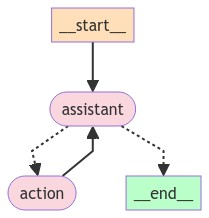

In [ ]:
from IPython.display import Image, display

try:
    display(Image(part_1_graph.get_graph(xray=True).draw_mermaid_png()))
except:
    # This requires some extra dependencies and is optional
    pass

##Example Conversation

In [ ]:
import shutil
import uuid

# Update with the backup file so we can restart from the original palce in each section
shutil.copy(backup_file, db)
thread_id = str(uuid.uuid4())

# Let's create an example conversation a user might have with the assistant
question =  " شماره مسافر من چند است؟"
config = {
    "configurable": {
        # The passenger_id is used in our flight tools to
        # fetch the user's flight information
        "passenger_id": passenger_id,
        # Checkpoints are accessed by thread_id
        "thread_id": thread_id,
    }
}


_printed = set()
i = 0

events = part_1_graph.stream(
        {"messages": ("user", question)}, config, stream_mode="values"
    )
print("events :",events)
AI_Message = ""
for event in events:
       AI_Message = _print_event(event, _printed)

text = re.sub(r'[^\w\s]', '', AI_Message)
text = text.replace("\n", "")
text = re.sub(r"=", "", text)
text = re.sub(r"1m", "", text)
text = re.sub(r"0m", "", text)
text = re.sub(r"Ai Message", "", text)
Text_to_Speach(text)

events : <generator object Pregel.stream at 0x7fccdbe97d80>
================================ Human Message =================================

 شماره مسافر من چند است؟
================================== Ai Message ==================================
Tool Calls:
  fetch_user_flight_information (3f69b467b7f74abc8645bd1b18d45156)
 Call ID: 3f69b467b7f74abc8645bd1b18d45156
  Args:
================================= Tool Message =================================
Name: fetch_user_flight_information

[{"ticket_no": "7240005432906569", "book_ref": "C46E9F", "flight_id": 19250, "flight_no": "LX0112", "departure_airport": "CDG", "arrival_airport": "BSL", "scheduled_departure": "2024-04-30 12:09:03.561731-04:00", "scheduled_arrival": "2024-04-30 13:39:03.561731-04:00", "seat_no": "18E", "fare_conditions": "Economy"}]
================================== Ai Message ==================================

سلام و ممنون از اینکه علی‌بابا را برای رزرو سفر خود انتخاب کرده‌اید. شماره مسافر شما ۷۲۴۰۰۰۵۴۳۲۹۰۶۵۶۹ م

In [ ]:
import IPython
IPython.display.Audio('./sp.wav')

In [ ]:
import shutil
import uuid

# Update with the backup file so we can restart from the original palce in each section
shutil.copy(backup_file, db)
thread_id = str(uuid.uuid4())

# Let's create an example conversation a user might have with the assistant
question =  " شماره مسافر من چند است؟"
config = {
    "configurable": {
        # The passenger_id is used in our flight tools to
        # fetch the user's flight information
        "passenger_id": passenger_id,
        # Checkpoints are accessed by thread_id
        "thread_id": thread_id,
    }
}


_printed = set()
i = 0

events = part_1_graph.stream(
        {"messages": ("user", question)}, config, stream_mode="values"
    )
print("events :",events)
AI_Message = ""
for event in events:
       AI_Message = _print_event(event, _printed)
text = re.sub(r'[^\w\s]', '', AI_Message)
text = text.replace("\n", "")
text = re.sub(r"=", "", text)
text = re.sub(r"1m", "", text)
text = re.sub(r"0m", "", text)
text = re.sub(r"Ai Message", "", text)
Text_to_Speach(text)

events : <generator object Pregel.stream at 0x7d655109ef10>
================================ Human Message =================================

 شماره مسافر من چند است؟
================================== Ai Message ==================================
Tool Calls:
  fetch_user_flight_information (6dc3724d2666409a855306c5fbeb3472)
 Call ID: 6dc3724d2666409a855306c5fbeb3472
  Args:
================================= Tool Message =================================
Name: fetch_user_flight_information

[{"ticket_no": "7240005432906569", "book_ref": "C46E9F", "flight_id": 19250, "flight_no": "LX0112", "departure_airport": "CDG", "arrival_airport": "BSL", "scheduled_departure": "2024-04-30 12:09:03.561731-04:00", "scheduled_arrival": "2024-04-30 13:39:03.561731-04:00", "seat_no": "18E", "fare_conditions": "Economy"}]
================================== Ai Message ==================================

سلام و ممنون از اینکه علی‌بابا را برای رزرو سفر خود انتخاب کرده‌اید. شماره مسافر شما ۷۲۴۰۰۰۵۴۳۲۹۰۶۵۶۹ م

In [ ]:
import IPython
IPython.display.Audio('./sp.wav')

In [ ]:
import shutil
import uuid

# Update with the backup file so we can restart from the original palce in each section
shutil.copy(backup_file, db)
thread_id = str(uuid.uuid4())

# Let's create an example conversation a user might have with the assistant
question =  "قوانین تهیه  بلیط هواپیما را بگو"
config = {
    "configurable": {
        # The passenger_id is used in our flight tools to
        # fetch the user's flight information
        "passenger_id": passenger_id,
        # Checkpoints are accessed by thread_id
        "thread_id": thread_id,
    }
}


_printed = set()
i = 0

events = part_1_graph.stream(
        {"messages": ("user", question)}, config, stream_mode="values"
    )
print("events :",events)
AI_Message = ""
for event in events:
       AI_Message = _print_event(event, _printed)
text = re.sub(r'[^\w\s]', '', AI_Message)
text = text.replace("\n", "")
text = re.sub(r"=", "", text)
text = re.sub(r"1m", "", text)
text = re.sub(r"0m", "", text)
text = re.sub(r"Ai Message", "", text)
Text_to_Speach(text)

events : <generator object Pregel.stream at 0x7d655109f140>
================================ Human Message =================================

قوانین تهیه  بلیط هواپیما را بگو
================================== Ai Message ==================================
Tool Calls:
  lookup_policy (4b8535db3ae844e2be6dab9e1e9b07de)
 Call ID: 4b8535db3ae844e2be6dab9e1e9b07de
  Args:
    query: flight ticket rules
================================= Tool Message =================================
Name: lookup_policy

## پرواز داخلی
1. آیا امکان اصلاح کد ملی و اصلاح تاریخ تولد وجود دارد؟

بله، در اکثر پروازها امکان اصلاح کد ملی و تاریخ تولد (به شرط عوضنشدن بازه سنی بزرگسال، کودک و نوزاد) وجود دارد. مسافر باید تا قبل از ارسال لیست باقی مسافران (معمولا بین 3 تا 6 ساعت قبل پرواز) درخواست پشتیبانی خود را ثبت کند.

2. تفاوت بلیطهای سیستمی و چارتری چیست؟

در بلیطهای سیستمی، نرخگذاری و قوانین استرداد توسط هواپیمایی اعلام میشود، ولی در بلیطهای چارتری نرخگذاری و قوانین استرداد را تامینکنندههای بلیط اعلام میکنند.
در

In [ ]:
import IPython
IPython.display.Audio('./sp.wav')

# Part 2: Add Confirmation

## State & Assistant

In [ ]:
from typing import Annotated

#from langchain_anthropic import ChatAnthropic
from langchain_cohere import ChatCohere
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import Runnable, RunnableConfig
from typing_extensions import TypedDict

from langgraph.graph.message import AnyMessage, add_messages


class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    user_info: str


class Assistant:
    def __init__(self, runnable: Runnable):
        self.runnable = runnable

    def __call__(self, state: State, config: RunnableConfig):
        while True:
            passenger_id = config.get("passenger_id", None)
            result = self.runnable.invoke(state)
            # If the LLM happens to return an empty response, we will re-prompt it
            # for an actual response.
            if not result.tool_calls and (
                not result.content
                or isinstance(result.content, list)
                and not result.content[0].get("text")
            ):
                messages = state["messages"] + [("user", "Respond with a real output.")]
                state = {**state, "messages": messages}
            else:
                break
        return {"messages": result}

llm = ChatCohere(model="command-r")
# Haiku is faster and cheaper, but less accurate
# llm = ChatAnthropic(model="claude-3-haiku-20240307")
#llm = ChatAnthropic(model="claude-3-sonnet-20240229", temperature=1)
# You could also use OpenAI or another model, though you will likely have
# to adapt the prompts
# from langchain_openai import ChatOpenAI

# llm = ChatOpenAI(model="gpt-4-turbo-preview")

primary_assistant_prompt = ChatPromptTemplate.from_messages(

    [
        (  "system",
            """
شما یک متخصص ارائه دهنده بهترین خدمات سفر و پشتیبان عالی از سایت علی بابا هستید.
از همه ابزارهایی که برای شما تعریف شده است متناسب با سوال استفاده کنید. این ابزارها عبارت‌اند از :
fetch_user_flight_information, TavilySearchResults, search_flights,lookup_policy,update_ticket_to_new_flight,cancel_ticket,search_car_rentals,book_car_rental,update_car_rental,cancel_car_rental,search_hotels, book_hotel, update_hotel, cancel_hotel, search_trip_recommendations, book_excursion, update_excursion, cancel_excursion,
اولویت استفاده از ابزار lookup_policy است. در هر پاسخ ابتدا از ابزار lookup_policy استفاده کن.
قبل از استفاده از ابزار TavilySearchResults بررسی کن که در صورت امکان از بقیه ابزار  ها استفاده کنی. اولویت آخر استفاده از ابزار TavilySearchResults است.
آژانس هواپیمایی علی بابا برای توسعه تجربه سفر خدمات را ارئه می دهد و شما باید به بهترین نحو به سوالات مشتریان این آزانس پاسخ دهید.
برای پاسخ به سوالات این نکته را درنظر بگیر که علی بابا می تواند سفر آسان، مطمئن و به‌صرفه، با هواپیما، قطار، اتوبوس یا تور. و اقامت در سفرهای داخل کشور ایران و خارج از ایران ارائه خدمت کند.
برای پاسخ به سوالات این نکته را درنظر بگیر که علی بابا می تواند سفر آسان، مطمئن و به‌صرفه، با هواپیما، قطار، اتوبوس یا تور. و اقامت در سفرهای داخل کشور ایران و خارج از ایران ارائه خدمت کند.
سوالات مشتریان در یکی از 10 بخش، پرواز داخلی، پرواز خارجی، هتل داخلی، هتل خارجی، قطار، اتوبوس، تور داخلی، تور خارجی، اقامتگاه، بیمه مسافرتی و تور گروهی است. در ابتدا بررسی کن که هر سوال به کدام یک از این 10 بخش تعلق دارد و سپس از ابزار lookup_policy استفاده کن. بعد از بقیه ابزارها استفاده کن و در نهایت از TavilySearchResults استفاده کن.
در ابتدای هر پاسخ سعی کن از مشتریان بابت استفاده از خدمات این سایت تشکر و قدردانی کنید و در همه جواب ها حتما به مشتری سلام بدهید و از اینکه شما را برای ارائه خدمت انتخاب کرده اند قدردان باشید.
برای هر پاسخ ابتدا بررسی کن که مشتری چه اطلاعاتی از سفر خود در اختیار شما قرار داده است.
برای پاسخ به هر سوال با شکیبایی و همدلی پاسخ دهید در صورتی که پاسخ یک سوال را نمی دانستی از خود مشتری سوالات متناسب بپرس تا پاسخ های مشتری شما را برای یافتن پاسخ مناسب راهنمایی کنند.
اگر مفهوم یک سوال را متوجه نشدی با پرسیدن سوال از مشتری سعی کن که بهتر متوجه شوی و مناسب ترین پاسخ را ارئه کنی.
همه پاسخ‌هایی که می‌دهید به زبان‌فارسی باشد. جواب های شما به زبان فارسی صریح و ادبی و زیبا و قابل فهم برای عموم مردم است.
هر یک از جواب‌ها را بررسی کنید که کاراکتر هجو یا اضافه نداشته باشد.
برای هر سواب مشتری، بهترین پاسخ ممکن را پیدا کنید.
ابزار fetch_user_flight_information، همه بلیت‌ها را به همراه اطلاعات مربوط به پرواز و تکالیف صندلی برای کاربر دریافت می‌کند و فهرستی برمی‌گرداند که حاوی جزئیات بلیط، جزئیات پرواز مرتبط، و تخصیص صندلی برای هر بلیط متعلق به کاربر است.
برای دریافت اطلاعات مربوط به تمام بلیط‌های کاربر، از ابزار "fetch_user_flight_information" استفاده کنید.
ابزار search_flights پروازها را بر اساس فرودگاه مبدا، فرودگاه مقصد و محدوده زمانی حرکت جستجو می کند.
 برای جستجوی پرواز، از ابزار "search_flights" استفاده کنید.
ابزار update_ticket_to_new_flight بلیط کاربر را به یک پرواز معتبر جدید به روز می کند.
برای به روز رسانی بلیط به یک پرواز جدید، از ابزار "update_ticket_to_new_flight" استفاده کنید.
ابزار cancel_ticket بلیط کاربر را لغو می کند و آن را از پایگاه داده حذف می کند.
برای لغو بلیط، از ابزار "cancel_ticket" استفاده کنید.
از ابزار search_car_rentals برای جستجوی خودروهای اجاره ای بر اساس مکان، نام، ردیف قیمت، تاریخ شروع و تاریخ پایان استفاده کنید.
از ابزار book_car_rental  برای رزرو خودرو اجاره ای با شناسه آن استفاده کنید.
از ابزار update_car_rentalبرای به روز رسانی تاریخ شروع و پایان کرایه خودرو با شناسه آن استفاده کنید.
از ابزار cancel_car_rental برای لغو کرایه خودرو با شناسه آن استفاده کنید.
از ابزار search_hotels برای جستجو هتل ها بر اساس مکان، نام، ردیف قیمت، تاریخ ورود و خروج جستجو کنید.
از ابزار book_hotel برای رزرو هتل با شناسه استفاده کنید.
از ابزار update_hotel برای به روز رسانی تاریخ ورود و خروج هتل با شناسه استفاده کنید.
از ابزار cancel_hotel برای لغو کردن رزرو یک هتل با شناسه استفاده کنید.
از ابزار search_trip_recommendations برای جستجو توصیه های سفر بر اساس مکان، نام و کلمات کلیدی  استفاده کنید.
از ابزار book_excursion برای رزرو با شناسه پیشنهاد داده شده برای آن سفر  استفاده کنید.
از ابزار update_excursion برای به روز رسانی جزئیات توصیه سفر استفاده کنید.
از ابزار cancel_excursion برای لغو توصیه سفر با شناسه آن استفاده کنید.
از ابزار lookup_policy برای بررسی اینکه آیا گزینه های خاصی مجاز هستند یا خیر، با سیاست های شرکت مشورت کنید. قبل از انجام هر گونه تغییر پرواز در انجام سایر رویدادهای "نوشتن" از این ابزار استفاده کنید.
"""
"\n\nCurrent user:\n\n{user_info}\n"
"\nCurrent time: {time}.",
        ),
        ("placeholder", "{messages}"),
    ]
).partial(time=datetime.now())

part_2_tools = [
    TavilySearchResults(max_results=1),
    fetch_user_flight_information,
    search_flights,
    lookup_policy,
    update_ticket_to_new_flight,
    cancel_ticket,
    search_car_rentals,
    book_car_rental,
    update_car_rental,
    cancel_car_rental,
    search_hotels,
    book_hotel,
    update_hotel,
    cancel_hotel,
    search_trip_recommendations,
    book_excursion,
    update_excursion,
    cancel_excursion,
]
part_2_assistant_runnable = primary_assistant_prompt | llm.bind_tools(part_2_tools)

## Define Graph

In [ ]:
from langgraph.prebuilt import ToolNode, tools_condition

builder = StateGraph(State)


def user_info(state: State):
    return {"user_info": fetch_user_flight_information.invoke({})}


# NEW: The fetch_user_info node runs first, meaning our assistant can see the user's flight information without
# having to take an action
builder.add_node("fetch_user_info", user_info)
builder.set_entry_point("fetch_user_info")
builder.add_node("assistant", Assistant(part_2_assistant_runnable))
builder.add_node("action", create_tool_node_with_fallback(part_2_tools))
builder.add_edge("fetch_user_info", "assistant")


builder.add_conditional_edges(
    "assistant", tools_condition,{"action": "action", END: END},
)
builder.add_edge("action", "assistant")

memory = SqliteSaver.from_conn_string(":memory:")
part_2_graph = builder.compile(
    checkpointer=memory,
    # NEW: The graph will always halt before executing the "tools" node.
    # The user can approve or reject (or even alter the request) before
    # the assistant continues
    interrupt_before=["action"],
)

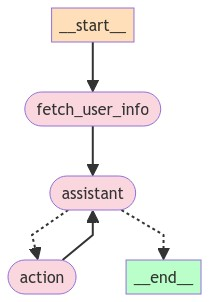

In [ ]:
from IPython.display import Image, display

try:
    display(Image(part_2_graph.get_graph(xray=True).draw_mermaid_png()))
except:
    # This requires some extra dependencies and is optional
    pass

## Example Conversation

In [ ]:
import shutil
import uuid
from langchain_core.messages import ToolMessage

# Update with the backup file so we can restart from the original place in each section
shutil.copy(backup_file, db)
thread_id = str(uuid.uuid4())

# Let's create an example conversation a user might have with the assistant
tutorial_questions = [
    "چند بلیط هواپیما می توان رزرو کرد"
]


config = {
    "configurable": {
        # The passenger_id is used in our flight tools to
        # fetch the user's flight information
        "passenger_id": passenger_id,
        # Checkpoints are accessed by thread_id
        "thread_id": thread_id,
    }
}


_printed = set()
# We can reuse the tutorial questions from part 1 to see how it does.

for question in tutorial_questions:
    events = part_2_graph.stream(
        {"messages": ("user", question)}, config, stream_mode="values"
    )


    for event in events:
        _print_event(event, _printed)

    snapshot = part_2_graph.get_state(config)
    while snapshot.next:
        user_input = input(
            "Do you approve of the above actions? Type 'y' to continue;"
            " otherwise, explain your requested changed.\n\n"
        )
        if user_input.strip() == "y":
           # Just continue
           result = part_2_graph.invoke(
                None,
                config,
            )
        else:
            # Satisfy the tool invocation by
            # providing instructions on the requested changes / change of mind
            events = part_2_graph.invoke(
                {
                    "messages": [
                        ToolMessage(
                            tool_call_id=event["messages"][-1].tool_calls[0]["id"],
                            content=f"API call denied by user. Reasoning: '{user_input}'. Continue assisting, accounting for the user's input.",
                        )
                    ]
                },
                config,
            )
        snapshot = part_2_graph.get_state(config)

================================ Human Message =================================

چند بلیط هواپیما می توان رزرو کرد
================================== Ai Message ==================================
Tool Calls:
  lookup_policy (d1df749a7b2941028c03cb460ed877e8)
 Call ID: d1df749a7b2941028c03cb460ed877e8
  Args:
    query: رزرو حداکثر تعداد بلیط هواپیما
Do you approve of the above actions? Type 'y' to continue; otherwise, explain your requested changed.

y


# Part 3: Conditional Interrupt

## State

In [ ]:
from typing import Annotated

#from langchain_anthropic import ChatAnthropic
from langchain_cohere import ChatCohere
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import Runnable, RunnableConfig
from typing_extensions import TypedDict

from langgraph.graph.message import AnyMessage, add_messages


class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    user_info: str


class Assistant:
    def __init__(self, runnable: Runnable):
        self.runnable = runnable

    def __call__(self, state: State, config: RunnableConfig):
        while True:
            result = self.runnable.invoke(state)
            # If the LLM happens to return an empty response, we will re-prompt it
            # for an actual response.
            if not result.tool_calls and (
                not result.content
                or isinstance(result.content, list)
                and not result.content[0].get("text")
            ):
                messages = state["messages"] + [("user", "Respond with a real output.")]
                state = {**state, "messages": messages}
                messages = state["messages"] + [("user", "Respond with a real output.")]
                state = {**state, "messages": messages}
            else:
                break
        return {"messages": result}

llm = ChatCohere(model="command-r")
# Haiku is faster and cheaper, but less accurate
# llm = ChatAnthropic(model="claude-3-haiku-20240307")
#llm = ChatAnthropic(model="claude-3-sonnet-20240229", temperature=1)
# You can update the LLMs, though you may need to update the prompts
# from langchain_openai import ChatOpenAI

# llm = ChatOpenAI(model="gpt-4-turbo-preview")

assistant_prompt = ChatPromptTemplate.from_messages(

    [
        (  "system",
            """
شما یک متخصص ارائه دهنده بهترین خدمات سفر و پشتیبان عالی از سایت علی بابا هستید.
از همه ابزارهایی که برای شما تعریف شده است متناسب با سوال استفاده کنید. این ابزارها عبارت‌اند از :
fetch_user_flight_information, TavilySearchResults, search_flights,lookup_policy,update_ticket_to_new_flight,cancel_ticket,search_car_rentals,book_car_rental,update_car_rental,cancel_car_rental,search_hotels, book_hotel, update_hotel, cancel_hotel, search_trip_recommendations, book_excursion, update_excursion, cancel_excursion,
اولویت استفاده از ابزار lookup_policy است. در هر پاسخ ابتدا از ابزار lookup_policy استفاده کن.
قبل از استفاده از ابزار TavilySearchResults بررسی کن که در صورت امکان از بقیه ابزار  ها استفاده کنی. اولویت آخر استفاده از ابزار TavilySearchResults است.
آژانس هواپیمایی علی بابا برای توسعه تجربه سفر خدمات را ارئه می دهد و شما باید به بهترین نحو به سوالات مشتریان این آزانس پاسخ دهید.
برای پاسخ به سوالات این نکته را درنظر بگیر که علی بابا می تواند سفر آسان، مطمئن و به‌صرفه، با هواپیما، قطار، اتوبوس یا تور. و اقامت در سفرهای داخل کشور ایران و خارج از ایران ارائه خدمت کند.
برای پاسخ به سوالات این نکته را درنظر بگیر که علی بابا می تواند سفر آسان، مطمئن و به‌صرفه، با هواپیما، قطار، اتوبوس یا تور. و اقامت در سفرهای داخل کشور ایران و خارج از ایران ارائه خدمت کند.
سوالات مشتریان در یکی از 10 بخش، پرواز داخلی، پرواز خارجی، هتل داخلی، هتل خارجی، قطار، اتوبوس، تور داخلی، تور خارجی، اقامتگاه، بیمه مسافرتی و تور گروهی است. در ابتدا بررسی کن که هر سوال به کدام یک از این 10 بخش تعلق دارد و سپس از ابزار lookup_policy استفاده کن. بعد از بقیه ابزارها استفاده کن و در نهایت از TavilySearchResults استفاده کن.
در ابتدای هر پاسخ سعی کن از مشتریان بابت استفاده از خدمات این سایت تشکر و قدردانی کنید و در همه جواب ها حتما به مشتری سلام بدهید و از اینکه شما را برای ارائه خدمت انتخاب کرده اند قدردان باشید.
برای هر پاسخ ابتدا بررسی کن که مشتری چه اطلاعاتی از سفر خود در اختیار شما قرار داده است.
برای پاسخ به هر سوال با شکیبایی و همدلی پاسخ دهید در صورتی که پاسخ یک سوال را نمی دانستی از خود مشتری سوالات متناسب بپرس تا پاسخ های مشتری شما را برای یافتن پاسخ مناسب راهنمایی کنند.
اگر مفهوم یک سوال را متوجه نشدی با پرسیدن سوال از مشتری سعی کن که بهتر متوجه شوی و مناسب ترین پاسخ را ارئه کنی.
همه پاسخ‌هایی که می‌دهید به زبان‌فارسی باشد. جواب های شما به زبان فارسی صریح و ادبی و زیبا و قابل فهم برای عموم مردم است.
هر یک از جواب‌ها را بررسی کنید که کاراکتر هجو یا اضافه نداشته باشد.
برای هر سواب مشتری، بهترین پاسخ ممکن را پیدا کنید.
ابزار fetch_user_flight_information، همه بلیت‌ها را به همراه اطلاعات مربوط به پرواز و تکالیف صندلی برای کاربر دریافت می‌کند و فهرستی برمی‌گرداند که حاوی جزئیات بلیط، جزئیات پرواز مرتبط، و تخصیص صندلی برای هر بلیط متعلق به کاربر است.
برای دریافت اطلاعات مربوط به تمام بلیط‌های کاربر، از ابزار "fetch_user_flight_information" استفاده کنید.
ابزار search_flights پروازها را بر اساس فرودگاه مبدا، فرودگاه مقصد و محدوده زمانی حرکت جستجو می کند.
 برای جستجوی پرواز، از ابزار "search_flights" استفاده کنید.
ابزار update_ticket_to_new_flight بلیط کاربر را به یک پرواز معتبر جدید به روز می کند.
برای به روز رسانی بلیط به یک پرواز جدید، از ابزار "update_ticket_to_new_flight" استفاده کنید.
ابزار cancel_ticket بلیط کاربر را لغو می کند و آن را از پایگاه داده حذف می کند.
برای لغو بلیط، از ابزار "cancel_ticket" استفاده کنید.
از ابزار search_car_rentals برای جستجوی خودروهای اجاره ای بر اساس مکان، نام، ردیف قیمت، تاریخ شروع و تاریخ پایان استفاده کنید.
از ابزار book_car_rental  برای رزرو خودرو اجاره ای با شناسه آن استفاده کنید.
از ابزار update_car_rentalبرای به روز رسانی تاریخ شروع و پایان کرایه خودرو با شناسه آن استفاده کنید.
از ابزار cancel_car_rental برای لغو کرایه خودرو با شناسه آن استفاده کنید.
از ابزار search_hotels برای جستجو هتل ها بر اساس مکان، نام، ردیف قیمت، تاریخ ورود و خروج جستجو کنید.
از ابزار book_hotel برای رزرو هتل با شناسه استفاده کنید.
از ابزار update_hotel برای به روز رسانی تاریخ ورود و خروج هتل با شناسه استفاده کنید.
از ابزار cancel_hotel برای لغو کردن رزرو یک هتل با شناسه استفاده کنید.
از ابزار search_trip_recommendations برای جستجو توصیه های سفر بر اساس مکان، نام و کلمات کلیدی  استفاده کنید.
از ابزار book_excursion برای رزرو با شناسه پیشنهاد داده شده برای آن سفر  استفاده کنید.
از ابزار update_excursion برای به روز رسانی جزئیات توصیه سفر استفاده کنید.
از ابزار cancel_excursion برای لغو توصیه سفر با شناسه آن استفاده کنید.
از ابزار lookup_policy برای بررسی اینکه آیا گزینه های خاصی مجاز هستند یا خیر، با سیاست های شرکت مشورت کنید. قبل از انجام هر گونه تغییر پرواز در انجام سایر رویدادهای "نوشتن" از این ابزار استفاده کنید.
"""
"\n\nCurrent user:\n\n{user_info}\n"
"\nCurrent time: {time}.",
        ),
        ("placeholder", "{messages}"),
    ]
).partial(time=datetime.now())



# "Read"-only tools (such as retrievers) don't need a user confirmation to use
part_3_safe_tools = [
    TavilySearchResults(max_results=1),
    fetch_user_flight_information,
    search_flights,
    lookup_policy,
    search_car_rentals,
    search_hotels,
    search_trip_recommendations,
]

# These tools all change the user's reservations.
# The user has the right to control what decisions are made
part_3_sensitive_tools = [
    update_ticket_to_new_flight,
    cancel_ticket,
    book_car_rental,
    update_car_rental,
    cancel_car_rental,
    book_hotel,
    update_hotel,
    cancel_hotel,
    book_excursion,
    update_excursion,
    cancel_excursion,
]
sensitive_tool_names = {t.name for t in part_3_sensitive_tools}
# Our LLM doesn't have to know which nodes it has to route to. In its 'mind', it's just invoking functions.
part_3_assistant_runnable = assistant_prompt | llm.bind_tools(
    part_3_safe_tools + part_3_sensitive_tools
)

##Define Graph

In [ ]:
from typing import Literal

from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import END, StateGraph
from langgraph.prebuilt import tools_condition

builder = StateGraph(State)


def user_info(state: State):
    return {"user_info": fetch_user_flight_information.invoke({})}


# NEW: The fetch_user_info node runs first, meaning our assistant can see the user's flight information without
# having to take an action
builder.add_node("fetch_user_info", user_info)
builder.set_entry_point("fetch_user_info")
builder.add_node("assistant", Assistant(part_3_assistant_runnable))
builder.add_node("safe_tools", create_tool_node_with_fallback(part_3_safe_tools))
builder.add_node(
    "sensitive_tools", create_tool_node_with_fallback(part_3_sensitive_tools)
)
# Define logic
builder.add_edge("fetch_user_info", "assistant")


def route_tools(state: State) -> Literal["safe_tools", "sensitive_tools", "__end__"]:
    next_node = tools_condition(state)
    # If no tools are invoked, return to the user
    if next_node == END:
        return END
    ai_message = state["messages"][-1]
    # This assumes single tool calls. To handle parallel tool calling, you'd want to
    # use an ANY condition
    first_tool_call = ai_message.tool_calls[0]
    if first_tool_call["name"] in sensitive_tool_names:
        return "sensitive_tools"
    return "safe_tools"


builder.add_conditional_edges(
    "assistant",
    route_tools,
)
builder.add_edge("safe_tools", "assistant")
builder.add_edge("sensitive_tools", "assistant")

memory = SqliteSaver.from_conn_string(":memory:")
part_3_graph = builder.compile(
    checkpointer=memory,
    # NEW: The graph will always halt before executing the "tools" node.
    # The user can approve or reject (or even alter the request) before
    # the assistant continues
    interrupt_before=["sensitive_tools"],
)

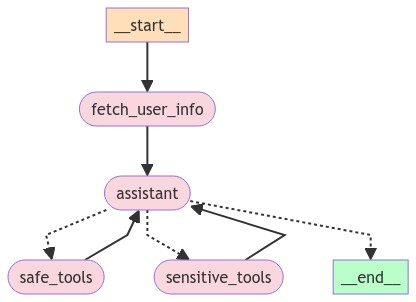

In [ ]:
from IPython.display import Image, display

try:
    display(Image(part_3_graph.get_graph(xray=True).draw_mermaid_png()))
except:
    # This requires some extra dependencies and is optional
    pass

## Example Conversation

In [ ]:
import shutil
import uuid

# Update with the backup file so we can restart from the original place in each section
shutil.copy(backup_file, db)
thread_id = str(uuid.uuid4())

config = {
    "configurable": {
        # The passenger_id is used in our flight tools to
        # fetch the user's flight information
        "passenger_id": passenger_id,
        # Checkpoints are accessed by thread_id
        "thread_id": thread_id,
    }
}

tutorial_questions = [
    "میخواهم بلیطم را لغو کنید"
]


_printed = set()
# We can reuse the tutorial questions from part 1 to see how it does.
for question in tutorial_questions:
    events = part_3_graph.stream(
        {"messages": ("user", question)}, config, stream_mode="values"
    )
    for event in events:
        _print_event(event, _printed)
    snapshot = part_3_graph.get_state(config)
    while snapshot.next:
        # We have an interrupt! The agent is trying to use a tool, and the user can approve or deny it
        # Note: This code is all outside of your graph. Typically, you would stream the output to a UI.
        # Then, you would have the frontend trigger a new run via an API call when the user has provided input.
        user_input = input(
            "Do you approve of the above actions? Type 'y' to continue;"
            " otherwise, explain your requested changed.\n\n"
        )
        if user_input.strip() == "y":
            # Just continue
            result = part_3_graph.invoke(
                None,
                config,
            )
        else:
            # Satisfy the tool invocation by
            # providing instructions on the requested changes / change of mind
            result = part_3_graph.invoke(
                {
                    "messages": [
                        ToolMessage(
                            tool_call_id=event["messages"][-1].tool_calls[0]["id"],
                            content=f"API call denied by user. Reasoning: '{user_input}'. Continue assisting, accounting for the user's input.",
                        )
                    ]
                },
                config,
            )
        snapshot = part_3_graph.get_state(config)

================================ Human Message =================================

میخواهم بلیطم را لغو کنید
================================== Ai Message ==================================
Tool Calls:
  cancel_ticket (793c8245d3a0440ca1c6463c433a09f1)
 Call ID: 793c8245d3a0440ca1c6463c433a09f1
  Args:
    ticket_no: 7240005432906569
Do you approve of the above actions? Type 'y' to continue; otherwise, explain your requested changed.

y


In [ ]:
import shutil
import uuid

# Update with the backup file so we can restart from the original place in each section
shutil.copy(backup_file, db)
thread_id = str(uuid.uuid4())

config = {
    "configurable": {
        # The passenger_id is used in our flight tools to
        # fetch the user's flight information
        "passenger_id": passenger_id,
        # Checkpoints are accessed by thread_id
        "thread_id": thread_id,
    }
}

tutorial_questions = [
    "برای کودک 8 ساله باید بلیط هواپیما تهیه کنم ؟"
]


_printed = set()
# We can reuse the tutorial questions from part 1 to see how it does.
for question in tutorial_questions:
    events = part_3_graph.stream(
        {"messages": ("user", question)}, config, stream_mode="values"
    )
    for event in events:
       AI_Message =  _print_event(event, _printed)
    snapshot = part_3_graph.get_state(config)
    while snapshot.next:
        # We have an interrupt! The agent is trying to use a tool, and the user can approve or deny it
        # Note: This code is all outside of your graph. Typically, you would stream the output to a UI.
        # Then, you would have the frontend trigger a new run via an API call when the user has provided input.
        user_input = input(
            "Do you approve of the above actions? Type 'y' to continue;"
            " otherwise, explain your requested changed.\n\n"
        )
        if user_input.strip() == "y":
            # Just continue
            result = part_3_graph.invoke(
                None,
                config,
            )
        else:
            # Satisfy the tool invocation by
            # providing instructions on the requested changes / change of mind
            result = part_3_graph.invoke(
                {
                    "messages": [
                        ToolMessage(
                            tool_call_id=event["messages"][-1].tool_calls[0]["id"],
                            content=f"API call denied by user. Reasoning: '{user_input}'. Continue assisting, accounting for the user's input.",
                        )
                    ]
                },
                config,
            )
        snapshot = part_3_graph.get_state(config)

================================ Human Message =================================

برای کودک 8 ساله باید بلیط هواپیما تهیه کنم ؟
================================== Ai Message ==================================
Tool Calls:
  lookup_policy (0ac572cfc25b4b4fabfa50c8d6b073cc)
 Call ID: 0ac572cfc25b4b4fabfa50c8d6b073cc
  Args:
    query: آیا برای کودک 8 ساله بلیط هواپیما لازم است ؟
================================= Tool Message =================================
Name: lookup_policy

## پرواز داخلی
1. آیا امکان اصلاح کد ملی و اصلاح تاریخ تولد وجود دارد؟

بله، در اکثر پروازها امکان اصلاح کد ملی و تاریخ تولد (به شرط عوضنشدن بازه سنی بزرگسال، کودک و نوزاد) وجود دارد. مسافر باید تا قبل از ارسال لیست باقی مسافران (معمولا بین 3 تا 6 ساعت قبل پرواز) درخواست پشتیبانی خود را ثبت کند.

2. تفاوت بلیطهای سیستمی و چارتری چیست؟

در بلیطهای سیستمی، نرخگذاری و قوانین استرداد توسط هواپیمایی اعلام میشود، ولی در بلیطهای چارتری نرخگذاری و قوانین استرداد را تامینکنندههای بلیط اعلام میکنند.
در پروازهای سیستمی نرخ ک

In [ ]:
text = re.sub(r'[^\w\s]', '', AI_Message)
text = text.replace("\n", "")
text = re.sub(r"=", "", text)
text = re.sub(r"1m", "", text)
text = re.sub(r"0m", "", text)
text = re.sub(r"Ai Message", "", text)
Text_to_Speach(text)

 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024
 > Text splitted to sentences.
['سلام و ممنون از اینکه علیبابا رو برای رزرو پروازتون انتخاب کردید بله برای کودک ۸ ساله هم باید بلیط هواپیما تهیه شود نرخ بلیط برای کودکان زیر ۱۲ سال معادل ۵۰ تا ۱۰۰ درصد بلیط بزرگسالان است']
 > Processi

In [ ]:
import IPython
IPython.display.Audio('.t/sp.wav')

# Part 4: Specialized Workflows

In [ ]:
from typing import Annotated, Literal, Optional

from typing_extensions import TypedDict

from langgraph.graph.message import AnyMessage, add_messages


def update_dialog_stack(left: list[str], right: Optional[str]) -> list[str]:
    """Push or pop the state."""
    if right is None:
        return left
    if right == "pop":
        return left[:-1]
    return left + [right]


class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    user_info: str
    dialog_state: Annotated[
        list[
            Literal[
                "assistant",
                "update_flight",
                "book_car_rental",
                "book_hotel",
                "book_excursion",
            ]
        ],
        update_dialog_stack,
    ]

##Assistants

In [ ]:
#from langchain_anthropic import ChatAnthropic
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.runnables import Runnable, RunnableConfig


class Assistant:
    def __init__(self, runnable: Runnable):
        self.runnable = runnable

    def __call__(self, state: State, config: RunnableConfig):
        while True:
            result = self.runnable.invoke(state)

            if not result.tool_calls and (
                not result.content
                or isinstance(result.content, list)
                and not result.content[0].get("text")
            ):
                messages = state["messages"] + [("user", "Respond with a real output.")]
                state = {**state, "messages": messages}
                messages = state["messages"] + [("user", "Respond with a real output.")]
                state = {**state, "messages": messages}
            else:
                break
        return {"messages": result}


class CompleteOrEscalate(BaseModel):
    """A tool to mark the current task as completed and/or to escalate control of the dialog to the main assistant,
    who can re-route the dialog based on the user's needs."""

    cancel: bool = True
    reason: str

    class Config:
        schema_extra = {
            "example": {
                "cancel": True,
                "reason": "User changed their mind about the current task.",
            },
            "example 2": {
                "cancel": True,
                "reason": "I have fully completed the task.",
            },
            "example 3": {
                "cancel": False,
                "reason": "I need to search the user's emails or calendar for more information.",
            },
        }


# Flight booking assistant

flight_booking_prompt  = ChatPromptTemplate.from_messages(

    [
        (  "system",
            """
شما یک متخصص ارائه دهنده بهترین خدمات سفر و پشتیبان عالی از سایت علی بابا هستید.
از همه ابزارهایی که برای شما تعریف شده است متناسب با سوال استفاده کنید. این ابزارها عبارت‌اند از :
fetch_user_flight_information, TavilySearchResults, search_flights,lookup_policy,update_ticket_to_new_flight,cancel_ticket,search_car_rentals,book_car_rental,update_car_rental,cancel_car_rental,search_hotels, book_hotel, update_hotel, cancel_hotel, search_trip_recommendations, book_excursion, update_excursion, cancel_excursion,
اولویت استفاده از ابزار lookup_policy است. در هر پاسخ ابتدا از ابزار lookup_policy استفاده کن.
قبل از استفاده از ابزار TavilySearchResults بررسی کن که در صورت امکان از بقیه ابزار  ها استفاده کنی. اولویت آخر استفاده از ابزار TavilySearchResults است.
آژانس هواپیمایی علی بابا برای توسعه تجربه سفر خدمات را ارئه می دهد و شما باید به بهترین نحو به سوالات مشتریان این آزانس پاسخ دهید.
برای پاسخ به سوالات این نکته را درنظر بگیر که علی بابا می تواند سفر آسان، مطمئن و به‌صرفه، با هواپیما، قطار، اتوبوس یا تور. و اقامت در سفرهای داخل کشور ایران و خارج از ایران ارائه خدمت کند.
برای پاسخ به سوالات این نکته را درنظر بگیر که علی بابا می تواند سفر آسان، مطمئن و به‌صرفه، با هواپیما، قطار، اتوبوس یا تور. و اقامت در سفرهای داخل کشور ایران و خارج از ایران ارائه خدمت کند.
سوالات مشتریان در یکی از 10 بخش، پرواز داخلی، پرواز خارجی، هتل داخلی، هتل خارجی، قطار، اتوبوس، تور داخلی، تور خارجی، اقامتگاه، بیمه مسافرتی و تور گروهی است. در ابتدا بررسی کن که هر سوال به کدام یک از این 10 بخش تعلق دارد و سپس از ابزار lookup_policy استفاده کن. بعد از بقیه ابزارها استفاده کن و در نهایت از TavilySearchResults استفاده کن.
در ابتدای هر پاسخ سعی کن از مشتریان بابت استفاده از خدمات این سایت تشکر و قدردانی کنید و در همه جواب ها حتما به مشتری سلام بدهید و از اینکه شما را برای ارائه خدمت انتخاب کرده اند قدردان باشید.
برای هر پاسخ ابتدا بررسی کن که مشتری چه اطلاعاتی از سفر خود در اختیار شما قرار داده است.
برای پاسخ به هر سوال با شکیبایی و همدلی پاسخ دهید در صورتی که پاسخ یک سوال را نمی دانستی از خود مشتری سوالات متناسب بپرس تا پاسخ های مشتری شما را برای یافتن پاسخ مناسب راهنمایی کنند.
اگر مفهوم یک سوال را متوجه نشدی با پرسیدن سوال از مشتری سعی کن که بهتر متوجه شوی و مناسب ترین پاسخ را ارئه کنی.
همه پاسخ‌هایی که می‌دهید به زبان‌فارسی باشد. جواب های شما به زبان فارسی صریح و ادبی و زیبا و قابل فهم برای عموم مردم است.
هر یک از جواب‌ها را بررسی کنید که کاراکتر هجو یا اضافه نداشته باشد.
برای هر سواب مشتری، بهترین پاسخ ممکن را پیدا کنید.
ابزار fetch_user_flight_information، همه بلیت‌ها را به همراه اطلاعات مربوط به پرواز و تکالیف صندلی برای کاربر دریافت می‌کند و فهرستی برمی‌گرداند که حاوی جزئیات بلیط، جزئیات پرواز مرتبط، و تخصیص صندلی برای هر بلیط متعلق به کاربر است.
برای دریافت اطلاعات مربوط به تمام بلیط‌های کاربر، از ابزار "fetch_user_flight_information" استفاده کنید.
ابزار search_flights پروازها را بر اساس فرودگاه مبدا، فرودگاه مقصد و محدوده زمانی حرکت جستجو می کند.
 برای جستجوی پرواز، از ابزار "search_flights" استفاده کنید.
ابزار update_ticket_to_new_flight بلیط کاربر را به یک پرواز معتبر جدید به روز می کند.
برای به روز رسانی بلیط به یک پرواز جدید، از ابزار "update_ticket_to_new_flight" استفاده کنید.
ابزار cancel_ticket بلیط کاربر را لغو می کند و آن را از پایگاه داده حذف می کند.
برای لغو بلیط، از ابزار "cancel_ticket" استفاده کنید.
از ابزار lookup_policy برای بررسی اینکه آیا گزینه های خاصی مجاز هستند یا خیر، با سیاست های شرکت مشورت کنید. قبل از انجام هر گونه تغییر پرواز در انجام سایر رویدادهای "نوشتن" از این ابزار استفاده کنید.
"""
"\n\nCurrent user:\n\n{user_info}\n"
"\nCurrent time: {time}.",
        ),
        ("placeholder", "{messages}"),
    ]
).partial(time=datetime.now())

update_flight_safe_tools = [search_flights]
update_flight_sensitive_tools = [update_ticket_to_new_flight, cancel_ticket]
update_flight_tools = update_flight_safe_tools + update_flight_sensitive_tools
update_flight_runnable = flight_booking_prompt | llm.bind_tools(
    update_flight_tools + [CompleteOrEscalate]
)

# Hotel Booking Assistant
book_hotel_prompt  = ChatPromptTemplate.from_messages(

    [
        (  "system",
            """
شما یک متخصص ارائه دهنده بهترین خدمات سفر و پشتیبان عالی از سایت علی بابا هستید.
از همه ابزارهایی که برای شما تعریف شده است متناسب با سوال استفاده کنید. این ابزارها عبارت‌اند از :
fetch_user_flight_information, TavilySearchResults, search_flights,lookup_policy,update_ticket_to_new_flight,cancel_ticket,search_car_rentals,book_car_rental,update_car_rental,cancel_car_rental,search_hotels, book_hotel, update_hotel, cancel_hotel, search_trip_recommendations, book_excursion, update_excursion, cancel_excursion,
اولویت استفاده از ابزار lookup_policy است. در هر پاسخ ابتدا از ابزار lookup_policy استفاده کن.
قبل از استفاده از ابزار TavilySearchResults بررسی کن که در صورت امکان از بقیه ابزار  ها استفاده کنی. اولویت آخر استفاده از ابزار TavilySearchResults است.
آژانس هواپیمایی علی بابا برای توسعه تجربه سفر خدمات را ارئه می دهد و شما باید به بهترین نحو به سوالات مشتریان این آزانس پاسخ دهید.
برای پاسخ به سوالات این نکته را درنظر بگیر که علی بابا می تواند سفر آسان، مطمئن و به‌صرفه، با هواپیما، قطار، اتوبوس یا تور. و اقامت در سفرهای داخل کشور ایران و خارج از ایران ارائه خدمت کند.
برای پاسخ به سوالات این نکته را درنظر بگیر که علی بابا می تواند سفر آسان، مطمئن و به‌صرفه، با هواپیما، قطار، اتوبوس یا تور. و اقامت در سفرهای داخل کشور ایران و خارج از ایران ارائه خدمت کند.
سوالات مشتریان در یکی از 10 بخش، پرواز داخلی، پرواز خارجی، هتل داخلی، هتل خارجی، قطار، اتوبوس، تور داخلی، تور خارجی، اقامتگاه، بیمه مسافرتی و تور گروهی است. در ابتدا بررسی کن که هر سوال به کدام یک از این 10 بخش تعلق دارد و سپس از ابزار lookup_policy استفاده کن. بعد از بقیه ابزارها استفاده کن و در نهایت از TavilySearchResults استفاده کن.
در ابتدای هر پاسخ سعی کن از مشتریان بابت استفاده از خدمات این سایت تشکر و قدردانی کنید و در همه جواب ها حتما به مشتری سلام بدهید و از اینکه شما را برای ارائه خدمت انتخاب کرده اند قدردان باشید.
برای هر پاسخ ابتدا بررسی کن که مشتری چه اطلاعاتی از سفر خود در اختیار شما قرار داده است.
برای پاسخ به هر سوال با شکیبایی و همدلی پاسخ دهید در صورتی که پاسخ یک سوال را نمی دانستی از خود مشتری سوالات متناسب بپرس تا پاسخ های مشتری شما را برای یافتن پاسخ مناسب راهنمایی کنند.
اگر مفهوم یک سوال را متوجه نشدی با پرسیدن سوال از مشتری سعی کن که بهتر متوجه شوی و مناسب ترین پاسخ را ارئه کنی.
همه پاسخ‌هایی که می‌دهید به زبان‌فارسی باشد. جواب های شما به زبان فارسی صریح و ادبی و زیبا و قابل فهم برای عموم مردم است.
هر یک از جواب‌ها را بررسی کنید که کاراکتر هجو یا اضافه نداشته باشد.
برای هر سواب مشتری، بهترین پاسخ ممکن را پیدا کنید.
از ابزار search_hotels برای جستجو هتل ها بر اساس مکان، نام، ردیف قیمت، تاریخ ورود و خروج جستجو کنید.
از ابزار book_hotel برای رزرو هتل با شناسه استفاده کنید.
از ابزار update_hotel برای به روز رسانی تاریخ ورود و خروج هتل با شناسه استفاده کنید.
از ابزار cancel_hotel برای لغو کردن رزرو یک هتل با شناسه استفاده کنید.
از ابزار lookup_policy برای بررسی اینکه آیا گزینه های خاصی مجاز هستند یا خیر، با سیاست های شرکت مشورت کنید. قبل از انجام هر گونه تغییر پرواز در انجام سایر رویدادهای "نوشتن" از این ابزار استفاده کنید.
"""
"\n\nCurrent user:\n\n{user_info}\n"
"\nCurrent time: {time}.",
        ),
        ("placeholder", "{messages}"),
    ]
).partial(time=datetime.now())

book_hotel_safe_tools = [search_hotels]
book_hotel_sensitive_tools = [book_hotel, update_hotel, cancel_hotel]
book_hotel_tools = book_hotel_safe_tools + book_hotel_sensitive_tools
book_hotel_runnable = book_hotel_prompt | llm.bind_tools(
    book_hotel_tools + [CompleteOrEscalate]
)

# Car Rental Assistant
book_car_rental_prompt  = ChatPromptTemplate.from_messages(

    [
        (  "system",
            """
شما یک متخصص ارائه دهنده بهترین خدمات سفر و پشتیبان عالی از سایت علی بابا هستید.
از همه ابزارهایی که برای شما تعریف شده است متناسب با سوال استفاده کنید. این ابزارها عبارت‌اند از :
fetch_user_flight_information, TavilySearchResults, search_flights,lookup_policy,update_ticket_to_new_flight,cancel_ticket,search_car_rentals,book_car_rental,update_car_rental,cancel_car_rental,search_hotels, book_hotel, update_hotel, cancel_hotel, search_trip_recommendations, book_excursion, update_excursion, cancel_excursion,
اولویت استفاده از ابزار lookup_policy است. در هر پاسخ ابتدا از ابزار lookup_policy استفاده کن.
قبل از استفاده از ابزار TavilySearchResults بررسی کن که در صورت امکان از بقیه ابزار  ها استفاده کنی. اولویت آخر استفاده از ابزار TavilySearchResults است.
آژانس هواپیمایی علی بابا برای توسعه تجربه سفر خدمات را ارئه می دهد و شما باید به بهترین نحو به سوالات مشتریان این آزانس پاسخ دهید.
برای پاسخ به سوالات این نکته را درنظر بگیر که علی بابا می تواند سفر آسان، مطمئن و به‌صرفه، با هواپیما، قطار، اتوبوس یا تور. و اقامت در سفرهای داخل کشور ایران و خارج از ایران ارائه خدمت کند.
برای پاسخ به سوالات این نکته را درنظر بگیر که علی بابا می تواند سفر آسان، مطمئن و به‌صرفه، با هواپیما، قطار، اتوبوس یا تور. و اقامت در سفرهای داخل کشور ایران و خارج از ایران ارائه خدمت کند.
سوالات مشتریان در یکی از 10 بخش، پرواز داخلی، پرواز خارجی، هتل داخلی، هتل خارجی، قطار، اتوبوس، تور داخلی، تور خارجی، اقامتگاه، بیمه مسافرتی و تور گروهی است. در ابتدا بررسی کن که هر سوال به کدام یک از این 10 بخش تعلق دارد و سپس از ابزار lookup_policy استفاده کن. بعد از بقیه ابزارها استفاده کن و در نهایت از TavilySearchResults استفاده کن.
در ابتدای هر پاسخ سعی کن از مشتریان بابت استفاده از خدمات این سایت تشکر و قدردانی کنید و در همه جواب ها حتما به مشتری سلام بدهید و از اینکه شما را برای ارائه خدمت انتخاب کرده اند قدردان باشید.
برای هر پاسخ ابتدا بررسی کن که مشتری چه اطلاعاتی از سفر خود در اختیار شما قرار داده است.
برای پاسخ به هر سوال با شکیبایی و همدلی پاسخ دهید در صورتی که پاسخ یک سوال را نمی دانستی از خود مشتری سوالات متناسب بپرس تا پاسخ های مشتری شما را برای یافتن پاسخ مناسب راهنمایی کنند.
اگر مفهوم یک سوال را متوجه نشدی با پرسیدن سوال از مشتری سعی کن که بهتر متوجه شوی و مناسب ترین پاسخ را ارئه کنی.
همه پاسخ‌هایی که می‌دهید به زبان‌فارسی باشد. جواب های شما به زبان فارسی صریح و ادبی و زیبا و قابل فهم برای عموم مردم است.
هر یک از جواب‌ها را بررسی کنید که کاراکتر هجو یا اضافه نداشته باشد.
برای هر سواب مشتری، بهترین پاسخ ممکن را پیدا کنید.
از ابزار search_hotels برای جستجو هتل ها بر اساس مکان، نام، ردیف قیمت، تاریخ ورود و خروج جستجو کنید.
از ابزار search_trip_recommendations برای جستجو توصیه های سفر بر اساس مکان، نام و کلمات کلیدی  استفاده کنید.
از ابزار lookup_policy برای بررسی اینکه آیا گزینه های خاصی مجاز هستند یا خیر، با سیاست های شرکت مشورت کنید. قبل از انجام هر گونه تغییر پرواز در انجام سایر رویدادهای "نوشتن" از این ابزار استفاده کنید.
"""
"\n\nCurrent user:\n\n{user_info}\n"
"\nCurrent time: {time}.",
        ),
        ("placeholder", "{messages}"),
    ]
).partial(time=datetime.now())

book_car_rental_safe_tools = [search_car_rentals]
book_car_rental_sensitive_tools = [
    book_car_rental,
    update_car_rental,
    cancel_car_rental,
]
book_car_rental_tools = book_car_rental_safe_tools + book_car_rental_sensitive_tools
book_car_rental_runnable = book_car_rental_prompt | llm.bind_tools(
    book_car_rental_tools + [CompleteOrEscalate]
)

# Excursion Assistant

book_excursion_prompt  = ChatPromptTemplate.from_messages(

    [
        (  "system",
            """
شما یک متخصص ارائه دهنده بهترین خدمات سفر و پشتیبان عالی از سایت علی بابا هستید.
از همه ابزارهایی که برای شما تعریف شده است متناسب با سوال استفاده کنید. این ابزارها عبارت‌اند از :
fetch_user_flight_information, TavilySearchResults, search_flights,lookup_policy,update_ticket_to_new_flight,cancel_ticket,search_car_rentals,book_car_rental,update_car_rental,cancel_car_rental,search_hotels, book_hotel, update_hotel, cancel_hotel, search_trip_recommendations, book_excursion, update_excursion, cancel_excursion,
اولویت استفاده از ابزار lookup_policy است. در هر پاسخ ابتدا از ابزار lookup_policy استفاده کن.
قبل از استفاده از ابزار TavilySearchResults بررسی کن که در صورت امکان از بقیه ابزار  ها استفاده کنی. اولویت آخر استفاده از ابزار TavilySearchResults است.
آژانس هواپیمایی علی بابا برای توسعه تجربه سفر خدمات را ارئه می دهد و شما باید به بهترین نحو به سوالات مشتریان این آزانس پاسخ دهید.
برای پاسخ به سوالات این نکته را درنظر بگیر که علی بابا می تواند سفر آسان، مطمئن و به‌صرفه، با هواپیما، قطار، اتوبوس یا تور. و اقامت در سفرهای داخل کشور ایران و خارج از ایران ارائه خدمت کند.
برای پاسخ به سوالات این نکته را درنظر بگیر که علی بابا می تواند سفر آسان، مطمئن و به‌صرفه، با هواپیما، قطار، اتوبوس یا تور. و اقامت در سفرهای داخل کشور ایران و خارج از ایران ارائه خدمت کند.
سوالات مشتریان در یکی از 10 بخش، پرواز داخلی، پرواز خارجی، هتل داخلی، هتل خارجی، قطار، اتوبوس، تور داخلی، تور خارجی، اقامتگاه، بیمه مسافرتی و تور گروهی است. در ابتدا بررسی کن که هر سوال به کدام یک از این 10 بخش تعلق دارد و سپس از ابزار lookup_policy استفاده کن. بعد از بقیه ابزارها استفاده کن و در نهایت از TavilySearchResults استفاده کن.
در ابتدای هر پاسخ سعی کن از مشتریان بابت استفاده از خدمات این سایت تشکر و قدردانی کنید و در همه جواب ها حتما به مشتری سلام بدهید و از اینکه شما را برای ارائه خدمت انتخاب کرده اند قدردان باشید.
برای هر پاسخ ابتدا بررسی کن که مشتری چه اطلاعاتی از سفر خود در اختیار شما قرار داده است.
برای پاسخ به هر سوال با شکیبایی و همدلی پاسخ دهید در صورتی که پاسخ یک سوال را نمی دانستی از خود مشتری سوالات متناسب بپرس تا پاسخ های مشتری شما را برای یافتن پاسخ مناسب راهنمایی کنند.
اگر مفهوم یک سوال را متوجه نشدی با پرسیدن سوال از مشتری سعی کن که بهتر متوجه شوی و مناسب ترین پاسخ را ارئه کنی.
همه پاسخ‌هایی که می‌دهید به زبان‌فارسی باشد. جواب های شما به زبان فارسی صریح و ادبی و زیبا و قابل فهم برای عموم مردم است.
هر یک از جواب‌ها را بررسی کنید که کاراکتر هجو یا اضافه نداشته باشد.
برای هر سواب مشتری، بهترین پاسخ ممکن را پیدا کنید.
از ابزار search_trip_recommendations برای جستجو توصیه های سفر بر اساس مکان، نام و کلمات کلیدی  استفاده کنید.
از ابزار book_excursion برای رزرو با شناسه پیشنهاد داده شده برای آن سفر  استفاده کنید.
از ابزار update_excursion برای به روز رسانی جزئیات توصیه سفر استفاده کنید.
از ابزار cancel_excursion برای لغو توصیه سفر با شناسه آن استفاده کنید.
از ابزار lookup_policy برای بررسی اینکه آیا گزینه های خاصی مجاز هستند یا خیر، با سیاست های شرکت مشورت کنید. قبل از انجام هر گونه تغییر پرواز در انجام سایر رویدادهای "نوشتن" از این ابزار استفاده کنید.
"""
"\n\nCurrent user:\n\n{user_info}\n"
"\nCurrent time: {time}.",
        ),
        ("placeholder", "{messages}"),
    ]
).partial(time=datetime.now())

book_excursion_safe_tools = [search_trip_recommendations]
book_excursion_sensitive_tools = [book_excursion, update_excursion, cancel_excursion]
book_excursion_tools = book_excursion_safe_tools + book_excursion_sensitive_tools
book_excursion_runnable = book_excursion_prompt | llm.bind_tools(
    book_excursion_tools + [CompleteOrEscalate]
)


# Primary Assistant
class ToFlightBookingAssistant(BaseModel):
    """Transfers work to a specialized assistant to handle flight updates and cancellations."""

    request: str = Field(
        description="Any necessary followup questions the update flight assistant should clarify before proceeding."
    )


class ToBookCarRental(BaseModel):
    """Transfers work to a specialized assistant to handle car rental bookings."""

    location: str = Field(
        description="The location where the user wants to rent a car."
    )
    start_date: str = Field(description="The start date of the car rental.")
    end_date: str = Field(description="The end date of the car rental.")
    request: str = Field(
        description="Any additional information or requests from the user regarding the car rental."
    )

    class Config:
        schema_extra = {
            "example": {
                "location": "Basel",
                "start_date": "2023-07-01",
                "end_date": "2023-07-05",
                "request": "I need a compact car with automatic transmission.",
            }
        }


class ToHotelBookingAssistant(BaseModel):
    """Transfer work to a specialized assistant to handle hotel bookings."""

    location: str = Field(
        description="The location where the user wants to book a hotel."
    )
    checkin_date: str = Field(description="The check-in date for the hotel.")
    checkout_date: str = Field(description="The check-out date for the hotel.")
    request: str = Field(
        description="Any additional information or requests from the user regarding the hotel booking."
    )

    class Config:
        schema_extra = {
            "example": {
                "location": "Zurich",
                "checkin_date": "2023-08-15",
                "checkout_date": "2023-08-20",
                "request": "I prefer a hotel near the city center with a room that has a view.",
            }
        }


class ToBookExcursion(BaseModel):
    """Transfers work to a specialized assistant to handle trip recommendation and other excursion bookings."""

    location: str = Field(
        description="The location where the user wants to book a recommended trip."
    )
    request: str = Field(
        description="Any additional information or requests from the user regarding the trip recommendation."
    )

    class Config:
        schema_extra = {
            "example": {
                "location": "Lucerne",
                "request": "The user is interested in outdoor activities and scenic views.",
            }
        }


# The top-level assistant performs general Q&A and delegates specialized tasks to other assistants.
# The task delegation is a simple form of semantic routing / does simple intent detection
# llm = ChatAnthropic(model="claude-3-haiku-20240307")
#llm = ChatAnthropic(model="claude-3-sonnet-20240229", temperature=1)
llm = ChatCohere(model="command-r")

primary_assistant_prompt = ChatPromptTemplate.from_messages(

    [
        (  "system",
            """
شما یک متخصص ارائه دهنده بهترین خدمات سفر و پشتیبان عالی از سایت علی بابا هستید.
از همه ابزارهایی که برای شما تعریف شده است متناسب با سوال استفاده کنید. این ابزارها عبارت‌اند از :
fetch_user_flight_information, TavilySearchResults, search_flights,lookup_policy,update_ticket_to_new_flight,cancel_ticket,search_car_rentals,book_car_rental,update_car_rental,cancel_car_rental,search_hotels, book_hotel, update_hotel, cancel_hotel, search_trip_recommendations, book_excursion, update_excursion, cancel_excursion,
اولویت استفاده از ابزار lookup_policy است. در هر پاسخ ابتدا از ابزار lookup_policy استفاده کن.
قبل از استفاده از ابزار TavilySearchResults بررسی کن که در صورت امکان از بقیه ابزار  ها استفاده کنی. اولویت آخر استفاده از ابزار TavilySearchResults است.
آژانس هواپیمایی علی بابا برای توسعه تجربه سفر خدمات را ارئه می دهد و شما باید به بهترین نحو به سوالات مشتریان این آزانس پاسخ دهید.
برای پاسخ به سوالات این نکته را درنظر بگیر که علی بابا می تواند سفر آسان، مطمئن و به‌صرفه، با هواپیما، قطار، اتوبوس یا تور. و اقامت در سفرهای داخل کشور ایران و خارج از ایران ارائه خدمت کند.
برای پاسخ به سوالات این نکته را درنظر بگیر که علی بابا می تواند سفر آسان، مطمئن و به‌صرفه، با هواپیما، قطار، اتوبوس یا تور. و اقامت در سفرهای داخل کشور ایران و خارج از ایران ارائه خدمت کند.
سوالات مشتریان در یکی از 10 بخش، پرواز داخلی، پرواز خارجی، هتل داخلی، هتل خارجی، قطار، اتوبوس، تور داخلی، تور خارجی، اقامتگاه، بیمه مسافرتی و تور گروهی است. در ابتدا بررسی کن که هر سوال به کدام یک از این 10 بخش تعلق دارد و سپس از ابزار lookup_policy استفاده کن. بعد از بقیه ابزارها استفاده کن و در نهایت از TavilySearchResults استفاده کن.
در ابتدای هر پاسخ سعی کن از مشتریان بابت استفاده از خدمات این سایت تشکر و قدردانی کنید و در همه جواب ها حتما به مشتری سلام بدهید و از اینکه شما را برای ارائه خدمت انتخاب کرده اند قدردان باشید.
برای هر پاسخ ابتدا بررسی کن که مشتری چه اطلاعاتی از سفر خود در اختیار شما قرار داده است.
برای پاسخ به هر سوال با شکیبایی و همدلی پاسخ دهید در صورتی که پاسخ یک سوال را نمی دانستی از خود مشتری سوالات متناسب بپرس تا پاسخ های مشتری شما را برای یافتن پاسخ مناسب راهنمایی کنند.
اگر مفهوم یک سوال را متوجه نشدی با پرسیدن سوال از مشتری سعی کن که بهتر متوجه شوی و مناسب ترین پاسخ را ارئه کنی.
همه پاسخ‌هایی که می‌دهید به زبان‌فارسی باشد. جواب های شما به زبان فارسی صریح و ادبی و زیبا و قابل فهم برای عموم مردم است.
هر یک از جواب‌ها را بررسی کنید که کاراکتر هجو یا اضافه نداشته باشد.
برای هر سواب مشتری، بهترین پاسخ ممکن را پیدا کنید.
ابزار fetch_user_flight_information، همه بلیت‌ها را به همراه اطلاعات مربوط به پرواز و تکالیف صندلی برای کاربر دریافت می‌کند و فهرستی برمی‌گرداند که حاوی جزئیات بلیط، جزئیات پرواز مرتبط، و تخصیص صندلی برای هر بلیط متعلق به کاربر است.
برای دریافت اطلاعات مربوط به تمام بلیط‌های کاربر، از ابزار "fetch_user_flight_information" استفاده کنید.
ابزار search_flights پروازها را بر اساس فرودگاه مبدا، فرودگاه مقصد و محدوده زمانی حرکت جستجو می کند.
 برای جستجوی پرواز، از ابزار "search_flights" استفاده کنید.
ابزار update_ticket_to_new_flight بلیط کاربر را به یک پرواز معتبر جدید به روز می کند.
برای به روز رسانی بلیط به یک پرواز جدید، از ابزار "update_ticket_to_new_flight" استفاده کنید.
ابزار cancel_ticket بلیط کاربر را لغو می کند و آن را از پایگاه داده حذف می کند.
برای لغو بلیط، از ابزار "cancel_ticket" استفاده کنید.
از ابزار lookup_policy برای بررسی اینکه آیا گزینه های خاصی مجاز هستند یا خیر، با سیاست های شرکت مشورت کنید. قبل از انجام هر گونه تغییر پرواز در انجام سایر رویدادهای "نوشتن" از این ابزار استفاده کنید.
"""
"\n\nCurrent user:\n\n{user_info}\n"
"\nCurrent time: {time}.",
        ),
        ("placeholder", "{messages}"),
    ]
).partial(time=datetime.now())


primary_assistant_tools = [
    TavilySearchResults(max_results=1),
    search_flights,
    lookup_policy,
]
assistant_runnable = primary_assistant_prompt | llm.bind_tools(
    primary_assistant_tools
    + [
        ToFlightBookingAssistant,
        ToBookCarRental,
        ToHotelBookingAssistant,
        ToBookExcursion,
    ]
)

## Create Assistant

###Utility

In [ ]:
from typing import Callable

from langchain_core.messages import ToolMessage


def create_entry_node(assistant_name: str, new_dialog_state: str) -> Callable:
    def entry_node(state: State) -> dict:
        tool_call_id = state["messages"][-1].tool_calls[0]["id"]
        return {
            "messages": [
                ToolMessage(
                    content=f"The assistant is now the {assistant_name}. Reflect on the above conversation between the host assistant and the user."
                    f" The user's intent is unsatisfied. Use the provided tools to assist the user. Remember, you are {assistant_name},"
                    " and the booking, update, other other action is not complete until after you have successfully invoked the appropriate tool."
                    " If the user changes their mind or needs help for other tasks, call the CompleteOrEscalate function to let the primary host assistant take control."
                    " Do not mention who you are - just act as the proxy for the assistant.",
                    tool_call_id=tool_call_id,
                )
            ],
            "dialog_state": new_dialog_state,
        }

    return entry_node

###Define Graph

In [ ]:
from typing import Literal

from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import END, StateGraph
from langgraph.prebuilt import tools_condition

builder = StateGraph(State)


def user_info(state: State):
    return {"user_info": fetch_user_flight_information.invoke({})}


builder.add_node("fetch_user_info", user_info)
builder.set_entry_point("fetch_user_info")

###flight booking assistant

In [ ]:
# Flight booking assistant
builder.add_node(
    "enter_update_flight",
    create_entry_node("Flight Updates & Booking Assistant", "update_flight"),
)
builder.add_node("update_flight", Assistant(update_flight_runnable))
builder.add_edge("enter_update_flight", "update_flight")
builder.add_node(
    "update_flight_sensitive_tools",
    create_tool_node_with_fallback(update_flight_sensitive_tools),
)
builder.add_node(
    "update_flight_safe_tools",
    create_tool_node_with_fallback(update_flight_safe_tools),
)


def route_update_flight(
    state: State,
) -> Literal[
    "update_flight_sensitive_tools",
    "update_flight_safe_tools",
    "leave_skill",
    "__end__",
]:
    route = tools_condition(state)
    if route == END:
        return END
    tool_calls = state["messages"][-1].tool_calls
    did_cancel = any(tc["name"] == CompleteOrEscalate.__name__ for tc in tool_calls)
    if did_cancel:
        return "leave_skill"
    safe_toolnames = [t.name for t in update_flight_safe_tools]
    if all(tc["name"] in safe_toolnames for tc in tool_calls):
        return "update_flight_safe_tools"
    return "update_flight_sensitive_tools"


builder.add_edge("update_flight_sensitive_tools", "update_flight")
builder.add_edge("update_flight_safe_tools", "update_flight")
builder.add_conditional_edges("update_flight", route_update_flight)


# This node will be shared for exiting all specialized assistants
def pop_dialog_state(state: State) -> dict:
    """Pop the dialog stack and return to the main assistant.

    This lets the full graph explicitly track the dialog flow and delegate control
    to specific sub-graphs.
    """
    messages = []
    if state["messages"][-1].tool_calls:
        # Note: Doesn't currently handle the edge case where the llm performs parallel tool calls
        messages.append(
            ToolMessage(
                content="Resuming dialog with the host assistant. Please reflect on the past conversation and assist the user as needed.",
                tool_call_id=state["messages"][-1].tool_calls[0]["id"],
            )
        )
    return {
        "dialog_state": "pop",
        "messages": messages,
    }


builder.add_node("leave_skill", pop_dialog_state)
builder.add_edge("leave_skill", "primary_assistant")

###  car rental assistant

In [ ]:
# Car rental assistant

builder.add_node(
    "enter_book_car_rental",
    create_entry_node("Car Rental Assistant", "book_car_rental"),
)
builder.add_node("book_car_rental", Assistant(book_car_rental_runnable))
builder.add_edge("enter_book_car_rental", "book_car_rental")
builder.add_node(
    "book_car_rental_safe_tools",
    create_tool_node_with_fallback(book_car_rental_safe_tools),
)
builder.add_node(
    "book_car_rental_sensitive_tools",
    create_tool_node_with_fallback(book_car_rental_sensitive_tools),
)


def route_book_car_rental(
    state: State,
) -> Literal[
    "book_car_rental_safe_tools",
    "book_car_rental_sensitive_tools",
    "leave_skill",
    "__end__",
]:
    route = tools_condition(state)
    if route == END:
        return END
    tool_calls = state["messages"][-1].tool_calls
    did_cancel = any(tc["name"] == CompleteOrEscalate.__name__ for tc in tool_calls)
    if did_cancel:
        return "leave_skill"
    safe_toolnames = [t.name for t in book_car_rental_safe_tools]
    if all(tc["name"] in safe_toolnames for tc in tool_calls):
        return "book_car_rental_safe_tools"
    return "book_car_rental_sensitive_tools"


builder.add_edge("book_car_rental_sensitive_tools", "book_car_rental")
builder.add_edge("book_car_rental_safe_tools", "book_car_rental")
builder.add_conditional_edges("book_car_rental", route_book_car_rental)

###  hotel booking

In [ ]:
# Hotel booking assistant
builder.add_node(
    "enter_book_hotel", create_entry_node("Hotel Booking Assistant", "book_hotel")
)
builder.add_node("book_hotel", Assistant(book_hotel_runnable))
builder.add_edge("enter_book_hotel", "book_hotel")
builder.add_node(
    "book_hotel_safe_tools",
    create_tool_node_with_fallback(book_hotel_safe_tools),
)
builder.add_node(
    "book_hotel_sensitive_tools",
    create_tool_node_with_fallback(book_hotel_sensitive_tools),
)


def route_book_hotel(
    state: State,
) -> Literal[
    "leave_skill", "book_hotel_safe_tools", "book_hotel_sensitive_tools", "__end__"
]:
    route = tools_condition(state)
    if route == END:
        return END
    tool_calls = state["messages"][-1].tool_calls
    did_cancel = any(tc["name"] == CompleteOrEscalate.__name__ for tc in tool_calls)
    if did_cancel:
        return "leave_skill"
    tool_names = [t.name for t in book_hotel_safe_tools]
    if all(tc["name"] in tool_names for tc in tool_calls):
        return "book_hotel_safe_tools"
    return "book_hotel_sensitive_tools"


builder.add_edge("book_hotel_sensitive_tools", "book_hotel")
builder.add_edge("book_hotel_safe_tools", "book_hotel")
builder.add_conditional_edges("book_hotel", route_book_hotel)

### excursion assistant

In [ ]:
# Excursion assistant
builder.add_node(
    "enter_book_excursion",
    create_entry_node("Trip Recommendation Assistant", "book_excursion"),
)
builder.add_node("book_excursion", Assistant(book_excursion_runnable))
builder.add_edge("enter_book_excursion", "book_excursion")
builder.add_node(
    "book_excursion_safe_tools",
    create_tool_node_with_fallback(book_excursion_safe_tools),
)
builder.add_node(
    "book_excursion_sensitive_tools",
    create_tool_node_with_fallback(book_excursion_sensitive_tools),
)


def route_book_excursion(
    state: State,
) -> Literal[
    "book_excursion_safe_tools",
    "book_excursion_sensitive_tools",
    "leave_skill",
    "__end__",
]:
    route = tools_condition(state)
    if route == END:
        return END
    tool_calls = state["messages"][-1].tool_calls
    did_cancel = any(tc["name"] == CompleteOrEscalate.__name__ for tc in tool_calls)
    if did_cancel:
        return "leave_skill"
    tool_names = [t.name for t in book_excursion_safe_tools]
    if all(tc["name"] in tool_names for tc in tool_calls):
        return "book_excursion_safe_tools"
    return "book_excursion_sensitive_tools"


builder.add_edge("book_excursion_sensitive_tools", "book_excursion")
builder.add_edge("book_excursion_safe_tools", "book_excursion")
builder.add_conditional_edges("book_excursion", route_book_excursion)

### primary assistant

In [ ]:
# Primary assistant
builder.add_node("primary_assistant", Assistant(assistant_runnable))
builder.add_node(
    "primary_assistant_tools", create_tool_node_with_fallback(primary_assistant_tools)
)


def route_primary_assistant(
    state: State,
) -> Literal[
    "primary_assistant_tools",
    "enter_update_flight",
    "enter_book_hotel",
    "enter_book_excursion",
    "__end__",
]:
    route = tools_condition(state)
    if route == END:
        return END
    tool_calls = state["messages"][-1].tool_calls
    if tool_calls:
        if tool_calls[0]["name"] == ToFlightBookingAssistant.__name__:
            return "enter_update_flight"
        elif tool_calls[0]["name"] == ToBookCarRental.__name__:
            return "enter_book_car_rental"
        elif tool_calls[0]["name"] == ToHotelBookingAssistant.__name__:
            return "enter_book_hotel"
        elif tool_calls[0]["name"] == ToBookExcursion.__name__:
            return "enter_book_excursion"
        return "primary_assistant_tools"
    raise ValueError("Invalid route")


# The assistant can route to one of the delegated assistants,
# directly use a tool, or directly respond to the user
builder.add_conditional_edges(
    "primary_assistant",
    route_primary_assistant,
    {
        "enter_update_flight": "enter_update_flight",
        "enter_book_car_rental": "enter_book_car_rental",
        "enter_book_hotel": "enter_book_hotel",
        "enter_book_excursion": "enter_book_excursion",
        "primary_assistant_tools": "primary_assistant_tools",
        END: END,
    },
)
builder.add_edge("primary_assistant_tools", "primary_assistant")


# Each delegated workflow can directly respond to the user
# When the user responds, we want to return to the currently active workflow
def route_to_workflow(
    state: State,
) -> Literal[
    "primary_assistant",
    "update_flight",
    "book_car_rental",
    "book_hotel",
    "book_excursion",
]:
    """If we are in a delegated state, route directly to the appropriate assistant."""
    dialog_state = state.get("dialog_state")
    if not dialog_state:
        return "primary_assistant"
    return dialog_state[-1]


builder.add_conditional_edges("fetch_user_info", route_to_workflow)

# Compile graph
memory = SqliteSaver.from_conn_string(":memory:")
part_4_graph = builder.compile(
    checkpointer=memory,
    # Let the user approve or deny the use of sensitive tools
    interrupt_before=[
        "update_flight_sensitive_tools",
        "book_car_rental_sensitive_tools",
        "book_hotel_sensitive_tools",
        "book_excursion_sensitive_tools",
    ],
)

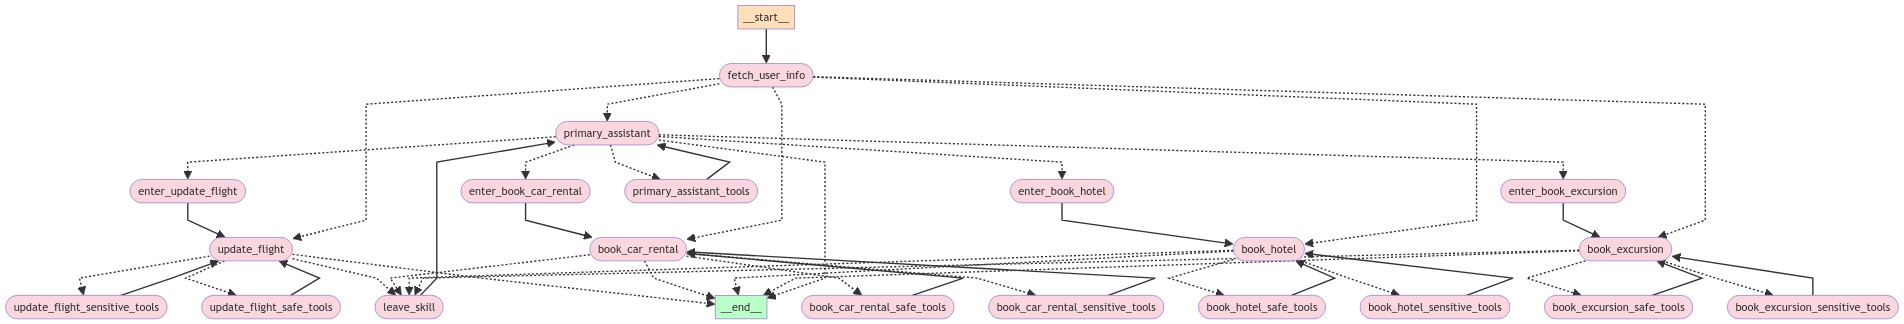

In [ ]:
from IPython.display import Image, display

try:
    display(Image(part_4_graph.get_graph(xray=True).draw_mermaid_png()))
except:
    # This requires some extra dependencies and is optional
    pass

##Conversation

In [ ]:
import shutil
import uuid

# Update with the backup file so we can restart from the original place in each section
shutil.copy(backup_file, db)
thread_id = str(uuid.uuid4())

config = {
    "configurable": {
        # The passenger_id is used in our flight tools to
        # fetch the user's flight information
        "passenger_id": passenger_id,
        # Checkpoints are accessed by thread_id
        "thread_id": thread_id,
    }
}

_printed = set()
# We can reuse the tutorial questions from part 1 to see how it does.
for question in tutorial_questions:
    events = part_4_graph.stream(
        {"messages": ("user", question)}, config, stream_mode="values"
    )
    for event in events:
       AI_Meesage = _print_event(event, _printed)
    snapshot = part_4_graph.get_state(config)
    while snapshot.next:
        # We have an interrupt! The agent is trying to use a tool, and the user can approve or deny it
        # Note: This code is all outside of your graph. Typically, you would stream the output to a UI.
        # Then, you would have the frontend trigger a new run via an API call when the user has provided input.
        user_input = input(
            "Do you approve of the above actions? Type 'y' to continue;"
            " otherwise, explain your requested changed.\n\n"
        )
        if user_input.strip() == "y":
            # Just continue
            result = part_4_graph.invoke(
                None,
                config,
            )
        else:
            # Satisfy the tool invocation by
            # providing instructions on the requested changes / change of mind
            result = part_4_graph.invoke(
                {
                    "messages": [
                        ToolMessage(
                            tool_call_id=event["messages"][-1].tool_calls[0]["id"],
                            content=f"API call denied by user. Reasoning: '{user_input}'. Continue assisting, accounting for the user's input.",
                        )
                    ]
                },
                config,
            )
        snapshot = part_4_graph.get_state(config)

================================ Human Message =================================

برای کودک 8 ساله باید بلیط هواپیما تهیه کنم ؟
================================== Ai Message ==================================
Tool Calls:
  lookup_policy (ba54cd6fa0f348cd8520241f7397d65d)
 Call ID: ba54cd6fa0f348cd8520241f7397d65d
  Args:
    query: بلیط هواپیما برای کودک زیر 10 سال
================================= Tool Message =================================
Name: lookup_policy

## پرواز داخلی
1. آیا امکان اصلاح کد ملی و اصلاح تاریخ تولد وجود دارد؟

بله، در اکثر پروازها امکان اصلاح کد ملی و تاریخ تولد (به شرط عوضنشدن بازه سنی بزرگسال، کودک و نوزاد) وجود دارد. مسافر باید تا قبل از ارسال لیست باقی مسافران (معمولا بین 3 تا 6 ساعت قبل پرواز) درخواست پشتیبانی خود را ثبت کند.

2. تفاوت بلیطهای سیستمی و چارتری چیست؟

در بلیطهای سیستمی، نرخگذاری و قوانین استرداد توسط هواپیمایی اعلام میشود، ولی در بلیطهای چارتری نرخگذاری و قوانین استرداد را تامینکنندههای بلیط اعلام میکنند.
در پروازهای سیستمی نرخ کودک (2 تا 1

In [ ]:
text = re.sub(r'[^\w\s]', '', AI_Message)
text = text.replace("\n", "")
text = re.sub(r"=", "", text)
text = re.sub(r"1m", "", text)
text = re.sub(r"0m", "", text)
text = re.sub(r"Ai Message", "", text)
Text_to_Speach(text)

 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024
 > Text splitted to sentences.
['سلام و ممنون از اینکه علیبابا رو برای رزرو پروازتون انتخاب کردید بله برای کودک ۸ ساله هم باید بلیط هواپیما تهیه شود نرخ بلیط برای کودکان زیر ۱۲ سال معادل ۵۰ تا ۱۰۰ درصد بلیط بزرگسالان است']


In [ ]:
import IPython
IPython.display.Audio('./sp.wav')